# OBJETIVO: Evaluar la eficiencia operativa de rutas de autobuses en funcion de pasajeros, ingresos y tarifas.

# Paso 1: Carga de datos e importación de Librerias.

In [1]:
import pandas as pd #importa libreria panda y abrevia como pd
import numpy as np # importa libreria numpy y abrevia como np
import matplotlib.pyplot as plt # importa libreria matplotlib y abrevia
import seaborn as sns # importa libreria seabron y abrevia como sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

###############################
# pandas ofrece una estructura de datos y herraminetas de manipulacion
# y analisis de datos efectivos. Proporciona un acceso rapido a datos
# estructurados
# numpy manipula array y matrices
# matplotlib sirve para vizualzacion de graficos y diagramas
# seaborn tabien hace vizualizaciones pero realiza maoas de calor
# series temporales

# Cargar archivo Excel
archivo = "DATA_GHO_VER09062025.xlsx" # le asigno a la variable archivo
# el nombre del archivo a leer
df = pd.read_excel(archivo, sheet_name="BASE")# codigo de lectura de a
# archivo excel y cargarlo como dataframe de python y se lo asigno
# a la variable df
df.head(5)# este codigo permite vizualizar las primeras n lineas del df

,ANIO-MES-DIA,CORRIDA,CV ORIGEN CORRIDA,CV DESTINO CORRIDA,HORA SALIDA ORIGEN RUTA,ACLAVEROL,MARCA COMERCIAL,NUMEROECONOMICO,VIAJES,PASAJEROS,INGRESOS,KMS CORRIDA,AUTOBUSES,FOP CORRIDA,FIK CORRIDA,FOF CORRIDA,CAPACIDAD AUTOBUS,NTARIFARUTA
0,2019-01-01,990703,HUET,MEXP,09:30:00,1305,DOBLE PISO CD HIDALGO,34016.0,1,48.0,12044,315,1,80.64,38.23,55.25,46,436.0
1,2019-01-01,990716,HUET,MEXP,20:59:00,1305,DOBLE PISO CD HIDALGO,34014.0,1,14.0,4046,315,1,28.16,12.84,19.65,46,436.0
2,2019-01-01,990718,HUET,MEXP,16:59:00,1305,DOBLE PISO CD HIDALGO,34011.0,1,49.0,12658,315,1,84.27,40.18,59.38,46,436.0
3,2019-01-01,990720,HUET,MEXP,10:50:00,1305,DOBLE PISO CD HIDALGO,34012.0,1,53.0,14667,315,1,100.00,46.56,71.58,46,436.0
4,2019-01-01,1027983,HUET,MEXP,22:00:00,1305,DOBLE PISO CD HIDALGO,NaN,1,31.0,10428,315,1,66.36,33.10,52.04,46,436.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55183 entries, 0 to 55182
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ANIO-MES-DIA             55183 non-null  datetime64[ns]
 1   CORRIDA                  55183 non-null  int64         
 2   CV ORIGEN CORRIDA        55183 non-null  object        
 3   CV DESTINO CORRIDA       55183 non-null  object        
 4   HORA SALIDA ORIGEN RUTA  55183 non-null  object        
 5   ACLAVEROL                55183 non-null  int64         
 6   MARCA COMERCIAL          55183 non-null  object        
 7   NUMEROECONOMICO          47629 non-null  float64       
 8   VIAJES                   55183 non-null  int64         
 9   PASAJEROS                46907 non-null  float64       
 10  INGRESOS                 55183 non-null  int64         
 11  KMS CORRIDA              55183 non-null  int64         
 12  AUTOBUSES                55183 n

In [5]:
df["CV ORIGEN CORRIDA"].unique()

array(['HUET', 'MEXP', 'MORE', 'TSFE', 'TMOR', 'TOLU', 'PHUE', 'TTOL',
       'TSAT', 'MEXN', 'TIBR'], dtype=object)

In [13]:
df["ANIO-MES-DIA"].unique()

<DatetimeArray>
['2019-01-01 00:00:00', '2019-01-02 00:00:00', '2019-01-03 00:00:00',
 '2019-01-04 00:00:00', '2019-01-05 00:00:00', '2019-01-06 00:00:00',
 '2019-01-07 00:00:00', '2019-01-08 00:00:00', '2019-01-09 00:00:00',
 '2019-01-10 00:00:00',
 ...
 '2025-05-22 00:00:00', '2025-05-23 00:00:00', '2025-05-24 00:00:00',
 '2025-05-25 00:00:00', '2025-05-26 00:00:00', '2025-05-27 00:00:00',
 '2025-05-28 00:00:00', '2025-05-29 00:00:00', '2025-05-30 00:00:00',
 '2025-05-31 00:00:00']
Length: 2343, dtype: datetime64[ns]

In [9]:
df["VIAJES"].unique()

array([1])

In [16]:
df["CAPACIDAD AUTOBUS"].unique()

array([ 46,  32,  54,  50,  40,  43,  44,  49,  36,  45,  56,  53,  41,
        48,  51,  58,  39,  82,  73,  59, 100,  38,  35,  33])

In [22]:
df_1 = df[df["CAPACIDAD AUTOBUS"] > 80]

In [23]:
df_1.head()

,ANIO-MES-DIA,CORRIDA,CV ORIGEN CORRIDA,CV DESTINO CORRIDA,HORA SALIDA ORIGEN RUTA,ACLAVEROL,MARCA COMERCIAL,NUMEROECONOMICO,VIAJES,PASAJEROS,INGRESOS,KMS CORRIDA,AUTOBUSES,FOP CORRIDA,FIK CORRIDA,FOF CORRIDA,CAPACIDAD AUTOBUS,NTARIFARUTA
32272,2022-10-28,76670,MEXP,CDHI,22:02:00,141201,DOBLE PISO SAN FELIPE,NaN,1,NaN,0,200,1,0.00,0.00,NaN,82,356.0
32375,2022-10-31,77232,MEXP,ZITA,21:00:00,141201,DOBLE PISO SAN FELIPE,NaN,1,NaN,0,150,1,0.00,0.00,NaN,82,302.0
33907,2022-12-29,84981,MEXP,CDHI,12:05:00,141201,DOBLE PISO SAN FELIPE,20111.0,1,NaN,0,200,1,0.00,0.00,NaN,82,360.0
33909,2022-12-29,1406937,MEXP,CDHI,12:00:00,1303,PLUS PONIENTE ACAMBARO CD HIDALGO,20093.0,1,54.0,12424,200,1,57.16,62.12,39.25,82,360.0
33943,2022-12-30,85082,MEXP,CDHI,12:11:00,141201,DOBLE PISO SAN FELIPE,20122.0,1,NaN,0,200,1,0.00,0.00,NaN,82,360.0


In [25]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, 32272 to 53927
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ANIO-MES-DIA             19 non-null     datetime64[ns]
 1   CORRIDA                  19 non-null     int64         
 2   CV ORIGEN CORRIDA        19 non-null     object        
 3   CV DESTINO CORRIDA       19 non-null     object        
 4   HORA SALIDA ORIGEN RUTA  19 non-null     object        
 5   ACLAVEROL                19 non-null     int64         
 6   MARCA COMERCIAL          19 non-null     object        
 7   NUMEROECONOMICO          14 non-null     float64       
 8   VIAJES                   19 non-null     int64         
 9   PASAJEROS                14 non-null     float64       
 10  INGRESOS                 19 non-null     int64         
 11  KMS CORRIDA              19 non-null     int64         
 12  AUTOBUSES                19 non-null

# ELIMINAR RUTA MEXP - CDHI

In [84]:
origen_buscado = 'MEXP'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 20160 viajes para la ruta 'MEXP -> CDHI' en los datos originales.

Aquí tienes una muestra de esos viajes:
   ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
6    2019-01-01  1015438              MEXP               CDHI   
7    2019-01-01  1018097              MEXP               CDHI   
8    2019-01-01  1018101              MEXP               CDHI   
9    2019-01-01  1018103              MEXP               CDHI   
10   2019-01-01  1018110              MEXP               CDHI   

   HORA SALIDA ORIGEN RUTA  ACLAVEROL  \
6                 10:00:00       1206   
7                 15:20:00       1306   
8                 23:59:00       1306   
9                 17:20:00       1306   
10                20:00:00       1306   

                              MARCA COMERCIAL  NUMEROECONOMICO  VIAJES  \
6   DOBLE PISO GUADALAJARA MANZANILLO MORELIA          20140.0       1   
7            DOBLE PISO ZACAPU CIUDAD HIDALGO          20070.0       1   
8  

In [85]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MEXP'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 55183

Número de filas en 'df' después de eliminar: 35023
✅ Se han eliminado 20160 filas que correspondían a la ruta 'MEXP -> CDHI'.


# ELIMINAR RUTA MEXP -> ZITA

In [87]:
origen_buscado = 'MEXP'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 9182 viajes para la ruta 'MEXP -> ZITA' en los datos originales.

Aquí tienes una muestra de esos viajes:
   ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
18   2019-01-01   990705              MEXP               ZITA   
19   2019-01-01  1018105              MEXP               ZITA   
20   2019-01-01  1018107              MEXP               ZITA   
21   2019-01-01  1029644              MEXP               ZITA   
22   2019-01-01  1029646              MEXP               ZITA   

   HORA SALIDA ORIGEN RUTA  ACLAVEROL                   MARCA COMERCIAL  \
18                18:40:00       1305             DOBLE PISO CD HIDALGO   
19                13:20:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
20                20:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
21                10:00:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
22                10:01:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   

    NUMEROECONOMICO  V

In [88]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MEXP'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 35023

Número de filas en 'df' después de eliminar: 25841
✅ Se han eliminado 9182 filas que correspondían a la ruta 'MEXP -> ZITA'.


# ELIMINAR RUTA MORE -> ZITA

In [89]:
origen_buscado = 'MORE'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 616 viajes para la ruta 'MORE -> ZITA' en los datos originales.

Aquí tienes una muestra de esos viajes:
    ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
51    2019-01-01  1017907              MORE               ZITA   
85    2019-01-02  1017907              MORE               ZITA   
123   2019-01-03  1017907              MORE               ZITA   
160   2019-01-04  1017907              MORE               ZITA   
198   2019-01-05  1017907              MORE               ZITA   

    HORA SALIDA ORIGEN RUTA  ACLAVEROL MARCA COMERCIAL  NUMEROECONOMICO  \
51                 06:40:00       6301  MORELIA ZAMORA              NaN   
85                 06:40:00       6301  MORELIA ZAMORA          20015.0   
123                06:40:00       6301  MORELIA ZAMORA          20067.0   
160                06:40:00       6301  MORELIA ZAMORA          33022.0   
198                06:40:00       6301  MORELIA ZAMORA          20026.0   

     VIAJES  PASA

In [90]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MORE'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 25841

Número de filas en 'df' después de eliminar: 25225
✅ Se han eliminado 616 filas que correspondían a la ruta 'MORE -> ZITA'.


# ELIMINAR RUTA MORE -> CDHI 

In [91]:
origen_buscado = 'MORE'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 195 viajes para la ruta 'MORE -> CDHI' en los datos originales.

Aquí tienes una muestra de esos viajes:
    ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
47    2019-01-01  1018113              MORE               CDHI   
81    2019-01-02  1018113              MORE               CDHI   
118   2019-01-03  1018113              MORE               CDHI   
156   2019-01-04  1018113              MORE               CDHI   
194   2019-01-05  1018113              MORE               CDHI   

    HORA SALIDA ORIGEN RUTA  ACLAVEROL                   MARCA COMERCIAL  \
47                 18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
81                 18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
118                18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
156                18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   
194                18:40:00       1306  DOBLE PISO ZACAPU CIUDAD HIDALGO   

     NUMERO

In [92]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MORE'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 25225

Número de filas en 'df' después de eliminar: 25030
✅ Se han eliminado 195 filas que correspondían a la ruta 'MORE -> CDHI'.


# ELIMINAR RUTA HUET ZITA

In [93]:
origen_buscado = 'HUET'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 119 viajes para la ruta 'HUET -> ZITA' en los datos originales.

Aquí tienes una muestra de esos viajes:
     ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
2643   2019-04-01  1062622              HUET               ZITA   
4094   2019-05-17  1084441              HUET               ZITA   
4130   2019-05-18  1084443              HUET               ZITA   
4163   2019-05-19  1085277              HUET               ZITA   
4193   2019-05-20  1085980              HUET               ZITA   

     HORA SALIDA ORIGEN RUTA  ACLAVEROL        MARCA COMERCIAL  \
2643                05:00:00       1305  DOBLE PISO CD HIDALGO   
4094                14:15:00       1305  DOBLE PISO CD HIDALGO   
4130                14:15:00       1305  DOBLE PISO CD HIDALGO   
4163                14:15:00       1305  DOBLE PISO CD HIDALGO   
4193                14:15:00       1305  DOBLE PISO CD HIDALGO   

      NUMEROECONOMICO  VIAJES  PASAJEROS  INGRESOS  KMS CORRIDA  

In [94]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'HUET'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 25030

Número de filas en 'df' después de eliminar: 24911
✅ Se han eliminado 119 filas que correspondían a la ruta 'HUET -> ZITA'.


# ELIMINR RUTA TIBR -> CDHI 

In [96]:
origen_buscado = 'TIBR'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 49 viajes para la ruta 'TIBR -> CDHI' en los datos originales.

Aquí tienes una muestra de esos viajes:
      ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
46824   2024-07-24    80945              TIBR               CDHI   
46847   2024-07-25    80945              TIBR               CDHI   
46870   2024-07-26    80945              TIBR               CDHI   
46895   2024-07-27    80945              TIBR               CDHI   
46920   2024-07-28    80945              TIBR               CDHI   

      HORA SALIDA ORIGEN RUTA  ACLAVEROL          MARCA COMERCIAL  \
46824                14:39:00       1303  DOBLE PISO C D. HIDALGO   
46847                14:39:00       1303  DOBLE PISO C D. HIDALGO   
46870                14:39:00       1303  DOBLE PISO C D. HIDALGO   
46895                14:39:00       1303  DOBLE PISO C D. HIDALGO   
46920                14:39:00       1303  DOBLE PISO C D. HIDALGO   

       NUMEROECONOMICO  VIAJES  PASAJEROS 

In [97]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'TIBR'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 24911

Número de filas en 'df' después de eliminar: 24862
✅ Se han eliminado 49 filas que correspondían a la ruta 'TIBR -> CDHI'.


In [68]:
horarios_distintos=df["HORA SALIDA ORIGEN RUTA"].unique()
print(horarios_distintos)

['09:30:00' '20:59:00' '16:59:00' '10:50:00' '22:00:00' '13:00:00'
 '10:40:00' '08:00:00' '23:20:00' '14:00:00' '07:20:00' '12:40:00'
 '16:00:00' '23:30:00' '07:35:00' '00:10:00' '00:20:00' '13:58:00'
 '13:56:00' '05:45:00' '13:40:00' '20:01:00' '08:10:00' '14:56:00'
 '13:26:00' '00:15:00' '00:05:00' '05:05:00' '06:20:00' '09:00:00'
 '11:01:00' '17:00:00' '20:31:00' '04:30:00' '17:20:00' '00:30:00'
 '19:00:00' '22:35:00' '13:59:00' '07:18:00' '15:55:00' '07:16:00'
 '23:15:00' '10:45:00' '23:18:00' '11:44:00' '12:15:00' '23:50:00'
 '21:58:00' '04:20:00' '09:55:00' '21:10:00' '14:02:00' '22:30:00'
 '20:30:00' '17:10:00' '16:10:00' '19:31:00' '17:36:00' '13:11:00'
 '17:29:00' '09:32:00' '09:05:00' '09:08:00' '14:30:00' '09:31:00'
 '23:46:00' '21:59:00' '19:16:00' '23:25:00' '07:10:00' '17:01:00'
 '22:15:00' '18:40:00' '11:40:00' '20:00:00' '09:25:00' '22:29:00'
 '12:41:00' '18:39:00' '08:50:00' '21:00:00' '07:05:00' '08:01:00'
 '18:00:00' '13:15:00' '13:17:00' '23:00:00' '12:20:00' '16:30

In [98]:
# .unique() devuelve un array con todos los valores únicos de la columna
origenes_unicos = df['CV ORIGEN CORRIDA'].unique()

print("Estos son todos los orígenes distintos en tus datos:")
print(origenes_unicos)

Estos son todos los orígenes distintos en tus datos:
['HUET' 'MEXP' 'MORE' 'TSFE' 'TMOR' 'TOLU' 'PHUE' 'TTOL' 'TSAT' 'MEXN'
 'TIBR']


Obsevamos que la variable "HORA SALIDA ORIGEN RUTA" es de tipo objet y no es funcional para el manejo estadistico, por tanto lo vamos a convertir en datatime.

# Paso 2: Preprocesamiento (o limpieza) de datos

In [99]:
# Paso 1: Asegúrate de que la columna de hora sea string (por si contiene objetos tipo datetime.time)
df["HORA SALIDA ORIGEN RUTA"] = df["HORA SALIDA ORIGEN RUTA"].astype(str)# el metodos astype convirte a todos los elemento de su columna a la izquierda en tipo string

# Paso 2: Combina fecha y hora
df["FECHA_HORA_SALIDA"] = pd.to_datetime(
    df["ANIO-MES-DIA"].dt.strftime("%Y-%m-%d") + " " + df["HORA SALIDA ORIGEN RUTA"],
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)

Tambien en la tabla anterior observamos que "PASAJEROS" y "NTARIFARUTA" tiene elementos Nan o vacios , que en este contexto es equivalente cero, pues debido a que diferentes personas capturan los datos algunos especifican como NaN cuando un autobus lleva cero pasajeros, observemos cuantos.

In [100]:
# Cuenta NaN
num_Nan_pasajeros = df["PASAJEROS"].isna().sum()#El metodo .isna extrae todo los elementos NaN de la columna de la izquierda 
num_Nan_Ntarifaruta = df["NTARIFARUTA"].isna().sum()
print(f"Número de NaN vacíos  en PASAJEROS: {num_Nan_pasajeros}")
print(f"Número de NaN vacíos en NTARIFARUA: {num_Nan_Ntarifaruta}")

Número de NaN vacíos  en PASAJEROS: 3389
Número de NaN vacíos en NTARIFARUA: 3116


Este resultado es el faltante de elementos en la columna "PASAJEROS" y "NTARIFARUTA", lo que haremos a continuacion es remplzar todos estos valosres NaN en cero para sus analisis posteriores. Ycomprobaremos que los cambios surtieron efectos.

In [101]:
# Usamos .fillna(0) y reasignamos el resultado a la misma columna.
# Es el método estándar y recomendado para esta tarea.
print("Rellenando valores nulos (NaN) con 0...")
df['PASAJEROS'] = df['PASAJEROS'].fillna(0)
df['NTARIFARUTA'] = df['NTARIFARUTA'].fillna(0)

# Convertimos la columna 'PASAJEROS' a tipo entero para mayor consistencia.
df['PASAJEROS'] = df['PASAJEROS'].astype(int)

# --- Verificación ---
# Comprobamos que la limpieza fue exitosa.
print("\nVerificando el resultado de la limpieza:")
print(f"Número de NaN en PASAJEROS después: {df['PASAJEROS'].isna().sum()}")
print(f"Número de NaN en NTARIFARUTA después: {df['NTARIFARUTA'].isna().sum()}")
print(f"Nuevo tipo de dato de la columna PASAJEROS: {df['PASAJEROS'].dtype}")

Rellenando valores nulos (NaN) con 0...

Verificando el resultado de la limpieza:
Número de NaN en PASAJEROS después: 0
Número de NaN en NTARIFARUTA después: 0
Nuevo tipo de dato de la columna PASAJEROS: int64


In [102]:
df["FECHA_HORA_SALIDA"].head()

0   2019-01-01 09:30:00
1   2019-01-01 20:59:00
2   2019-01-01 16:59:00
3   2019-01-01 10:50:00
4   2019-01-01 22:00:00
Name: FECHA_HORA_SALIDA, dtype: datetime64[ns]

Al final aparece una nueva columa de tipo datatime64[ns] y remplazara en su analisis a las columnas "ANIO-MES-DIA" y "HORA SALIDA ORIGEN RUTA". Ahora es importante observar esas tarifas que estan en ceros y cual es la ruta algunas de estas parten del taller, pero su verdadera ruta es una donde abordan pasajerso, haremos este cambio y ademas solo elejiremos las variables con las que nos quedaremos, reduciendo asi la dimension del problema

In [103]:
df_ceros_tarifa = df[df["NTARIFARUTA"] == 0]
print(df_ceros_tarifa.shape)
print(df[df["NTARIFARUTA"] == 0]["CV ORIGEN CORRIDA"].value_counts())
print(df[df["NTARIFARUTA"] == 0]["CV DESTINO CORRIDA"].value_counts())

(3586, 19)
CV ORIGEN CORRIDA
TSFE    1335
PHUE    1202
HUET     447
MEXP     347
TMOR     217
MORE      27
TTOL       4
TOLU       3
TSAT       2
MEXN       2
Name: count, dtype: int64
CV DESTINO CORRIDA
MEXP    944
ZITA    861
PHUE    563
MEXN    396
TSFE    369
CDHI    330
TMOR     84
MORE     17
HUET     13
TSAT      4
TTOL      3
TOLU      2
Name: count, dtype: int64


In [104]:
total_ceros = df[df["NTARIFARUTA"] == 0].shape[0]
conteo_origen = df[df["NTARIFARUTA"] == 0]["CV ORIGEN CORRIDA"].value_counts().sum()
conteo_destino = df[df["NTARIFARUTA"] == 0]["CV DESTINO CORRIDA"].value_counts().sum()
print("Total con NTARIFARUTA = 0:", total_ceros)
print("Suma por ORIGEN:", conteo_origen)
print("Suma por DESTINO:", conteo_destino)

Total con NTARIFARUTA = 0: 3586
Suma por ORIGEN: 3586
Suma por DESTINO: 3586


In [105]:
destinos_justificados = ["MEXP", "ZITA", "PHUE", "MEXN", "TSFE", "CDHI", "TMOR", "TSAT", "HUET", "TTOL"]
no_justificados_df = df[(df["NTARIFARUTA"] == 0) & (~df["CV DESTINO CORRIDA"].isin(destinos_justificados))]
print("No justificados:", no_justificados_df.shape[0])

No justificados: 19


In [106]:
# Eliminamos las 19 filas anómalas del DataFrame principal
print(f"Tamaño original del df: {df.shape}")
df.drop(no_justificados_df.index, inplace=True)
print(f"Tamaño del df después de eliminar anomalías: {df.shape}")

Tamaño original del df: (24862, 19)
Tamaño del df después de eliminar anomalías: (24843, 19)


In [107]:
df_rutas = df.groupby(["CV ORIGEN CORRIDA", "CV DESTINO CORRIDA"]).agg({
    "PASAJEROS": "sum",
    "INGRESOS": "mean",
    "NTARIFARUTA": "mean",
    "MARCA COMERCIAL": "count"
}).reset_index().sort_values(by="PASAJEROS", ascending=False)

df_rutas.head()

,CV ORIGEN CORRIDA,CV DESTINO CORRIDA,PASAJEROS,INGRESOS,NTARIFARUTA,MARCA COMERCIAL
5,MEXP,HUET,250165,8356.034550,469.656063,8162
1,HUET,MEXP,191568,6453.178816,468.807543,7874
6,MEXP,MORE,106130,9881.901896,562.058190,2110
9,MORE,MEXP,101322,8090.618021,558.390474,2597
0,HUET,MEXN,10342,7806.511509,0.000000,391


In [108]:
# --- 1. Estandarización de Nombres de Terminales ---
# Basado en tu conocimiento del negocio, unificamos los códigos de las terminales.

print("Estandarizando los nombres de las terminales...")
reemplazos = {
    "PHUE": "HUET",
    "TSFE": "MEXP",
    "TMOR": "MORE",
    "TTOL": "TOLU",
    "TSAT": "MEXN",
    "TIBR": "MEXP",
    ""
}


# Reemplazamos los nombres en las columnas de origen y destino del DataFrame principal.
df["CV ORIGEN CORRIDA"] = df["CV ORIGEN CORRIDA"].replace(reemplazos)
df["CV DESTINO CORRIDA"] = df["CV DESTINO CORRIDA"].replace(reemplazos)
print("Estandarización completada.")


# --- 2. Re-evaluación de las Rutas ---
# Volvemos a calcular la tabla de rutas ahora con los nombres unificados.
# Esto nos dará una visión mucho más precisa de las rutas más importantes.

print("\nRe-calculando la tabla de rutas con los nombres estandarizados...")
df_rutas_estandarizado = df.groupby(["CV ORIGEN CORRIDA", "CV DESTINO CORRIDA"]).agg({
    "PASAJEROS": "sum",
    "INGRESOS": "mean",
    "NTARIFARUTA": "mean",
    "MARCA COMERCIAL": "count"  # Usamos MARCA COMERCIAL como un contador de viajes
}).reset_index().sort_values(by="PASAJEROS", ascending=False)


# --- 3. Mostrar el Resultado ---
# Mostramos las 17 rutas más importantes después de la estandarización.
print("Mostrando las 17 rutas más importantes:")
print(df_rutas_estandarizado.shape)
df_rutas_estandarizado.head(17)

Estandarizando los nombres de las terminales...
Estandarización completada.

Re-calculando la tabla de rutas con los nombres estandarizados...
Mostrando las 17 rutas más importantes:
(14, 6)


,CV ORIGEN CORRIDA,CV DESTINO CORRIDA,PASAJEROS,INGRESOS,NTARIFARUTA,MARCA COMERCIAL
6,MEXP,HUET,271235,8196.944210,439.903944,8998
1,HUET,MEXP,206357,5953.699270,406.697139,9314
7,MEXP,MORE,109598,9824.861581,541.773769,2189
10,MORE,MEXP,102231,7942.353293,542.717088,2672
0,HUET,MEXN,10342,7630.865000,0.000000,400
5,MEXP,CDHI,8474,7429.115385,0.000000,286
13,TOLU,MORE,1370,3603.936170,445.017660,47
8,MEXP,ZITA,999,323.098901,0.000000,728
11,MORE,TOLU,728,3132.066667,444.033333,30
12,MORE,ZITA,544,564.925000,0.000000,120


# ELIMINAR RUTA MEXP - CDHI

In [109]:
origen_buscado = 'MEXP'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 286 viajes para la ruta 'MEXP -> CDHI' en los datos originales.

Aquí tienes una muestra de esos viajes:
     ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
86     2019-01-02  1030910              MEXP               CDHI   
1869   2019-03-04  1054251              MEXP               CDHI   
3082   2019-04-15  1069191              MEXP               CDHI   
3083   2019-04-15  1069225              MEXP               CDHI   
3235   2019-04-18  1071325              MEXP               CDHI   

     HORA SALIDA ORIGEN RUTA  ACLAVEROL  \
86                  07:35:00       1206   
1869                17:10:00       1306   
3082                00:20:00       1306   
3083                05:45:00       1306   
3235                10:23:00       6301   

                                MARCA COMERCIAL  NUMEROECONOMICO  VIAJES  \
86    DOBLE PISO GUADALAJARA MANZANILLO MORELIA          20142.0       1   
1869           DOBLE PISO ZACAPU CIUDAD HIDALGO    

In [110]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MEXP'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 24843

Número de filas en 'df' después de eliminar: 24557
✅ Se han eliminado 286 filas que correspondían a la ruta 'MEXP -> CDHI'.


# ELIMINAR RUTA MEXP - ZITA

In [111]:
origen_buscado = 'MEXP'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 728 viajes para la ruta 'MEXP -> ZITA' en los datos originales.

Aquí tienes una muestra de esos viajes:
    ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
87    2019-01-02  1030709              MEXP               ZITA   
88    2019-01-02  1030720              MEXP               ZITA   
124   2019-01-03  1031669              MEXP               ZITA   
125   2019-01-03  1031902              MEXP               ZITA   
126   2019-01-03  1032078              MEXP               ZITA   

    HORA SALIDA ORIGEN RUTA  ACLAVEROL  \
87                 00:10:00       6301   
88                 00:20:00       1305   
124                05:45:00       1305   
125                13:40:00       1206   
126                20:01:00       1206   

                               MARCA COMERCIAL  NUMEROECONOMICO  VIAJES  \
87                              MORELIA ZAMORA          33024.0       1   
88                       DOBLE PISO CD HIDALGO          34011.0  

In [112]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MEXP'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 24557

Número de filas en 'df' después de eliminar: 23829
✅ Se han eliminado 728 filas que correspondían a la ruta 'MEXP -> ZITA'.


# ELIMINAR RUTA MORE - ZITA

In [113]:
origen_buscado = 'MORE'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 120 viajes para la ruta 'MORE -> ZITA' en los datos originales.

Aquí tienes una muestra de esos viajes:
     ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
377    2019-01-11  1036396              MORE               ZITA   
1868   2019-03-04  1054146              MORE               ZITA   
3170   2019-04-17  1070494              MORE               ZITA   
3171   2019-04-17  1070524              MORE               ZITA   
5064   2019-06-18  1097203              MORE               ZITA   

     HORA SALIDA ORIGEN RUTA  ACLAVEROL MARCA COMERCIAL  NUMEROECONOMICO  \
377                 13:26:00       6301  MORELIA ZAMORA          20027.0   
1868                08:00:00       6301  MORELIA ZAMORA          20027.0   
3170                13:19:00       6301  MORELIA ZAMORA              NaN   
3171                13:19:00       6301  MORELIA ZAMORA              NaN   
5064                18:59:00       6301  MORELIA ZAMORA              NaN   

     

In [114]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MORE'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 23829

Número de filas en 'df' después de eliminar: 23709
✅ Se han eliminado 120 filas que correspondían a la ruta 'MORE -> ZITA'.


# ELIMINAR RUTA MORE - CDHI

In [115]:
origen_buscado = 'MORE'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 44 viajes para la ruta 'MORE -> CDHI' en los datos originales.

Aquí tienes una muestra de esos viajes:
     ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
846    2019-01-27  1042388              MORE               CDHI   
1652   2019-02-24  1051830              MORE               CDHI   
1841   2019-03-03  1053506              MORE               CDHI   
1842   2019-03-03  1053902              MORE               CDHI   
2447   2019-03-24  1060093              MORE               CDHI   

     HORA SALIDA ORIGEN RUTA  ACLAVEROL MARCA COMERCIAL  NUMEROECONOMICO  \
846                 17:20:00       6301  MORELIA ZAMORA          20025.0   
1652                21:10:00       6301  MORELIA ZAMORA          20026.0   
1841                09:00:00       6301  MORELIA ZAMORA          20027.0   
1842                20:30:00       6301  MORELIA ZAMORA          20027.0   
2447                09:00:00       6301  MORELIA ZAMORA              NaN   

      

In [116]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'MORE'
destino_a_eliminar = 'CDHI'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 23709

Número de filas en 'df' después de eliminar: 23665
✅ Se han eliminado 44 filas que correspondían a la ruta 'MORE -> CDHI'.


# ELIMINAR RUTA HUET - ZITA

In [117]:
origen_buscado = 'HUET'
destino_buscado = 'ZITA'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

✅ ¡Confirmado! Se encontraron 11 viajes para la ruta 'HUET -> ZITA' en los datos originales.

Aquí tienes una muestra de esos viajes:
      ANIO-MES-DIA  CORRIDA CV ORIGEN CORRIDA CV DESTINO CORRIDA  \
14995   2020-06-07  1213347              HUET               ZITA   
15794   2020-08-13  1228975              HUET               ZITA   
15826   2020-08-14  1229222              HUET               ZITA   
19809   2021-04-02  1271804              HUET               ZITA   
22559   2021-09-06    25573              HUET               ZITA   

      HORA SALIDA ORIGEN RUTA  ACLAVEROL        MARCA COMERCIAL  \
14995                18:10:00       1305  DOBLE PISO CD HIDALGO   
15794                22:29:00       1305  DOBLE PISO CD HIDALGO   
15826                22:35:00       1305  DOBLE PISO CD HIDALGO   
19809                08:10:00       1305  DOBLE PISO CD HIDALGO   
22559                13:00:00     141305       HUETAMO PURUARAN   

       NUMEROECONOMICO  VIAJES  PASAJEROS  INGRESOS  K

In [118]:
# Guardamos el número de filas original para verificar al final
filas_antes = len(df)
print(f"Número de filas en 'df' antes de eliminar: {filas_antes}")

# 1. Definir la ruta que quieres eliminar
origen_a_eliminar = 'HUET'
destino_a_eliminar = 'ZITA'

# 2. Crear el filtro para identificar las filas de esa ruta
filtro_ruta_a_eliminar = (df['CV ORIGEN CORRIDA'] == origen_a_eliminar) & \
                         (df['CV DESTINO CORRIDA'] == destino_a_eliminar)

# 3. Eliminar las filas usando el filtro invertido (~)
# Esto selecciona todas las filas que NO cumplen con la condición del filtro.
df = df[~filtro_ruta_a_eliminar].copy()

# 4. Verificar el resultado
filas_despues = len(df)
filas_eliminadas = filas_antes - filas_despues

print(f"\nNúmero de filas en 'df' después de eliminar: {filas_despues}")
print(f"✅ Se han eliminado {filas_eliminadas} filas que correspondían a la ruta '{origen_a_eliminar} -> {destino_a_eliminar}'.")

Número de filas en 'df' antes de eliminar: 23665

Número de filas en 'df' después de eliminar: 23654
✅ Se han eliminado 11 filas que correspondían a la ruta 'HUET -> ZITA'.


# ELIMINAR RUTA TIBR .> CDHI

In [119]:
origen_buscado = 'TIBR'
destino_buscado = 'CDHI'

# Filtramos el DataFrame 'df' usando los nombres correctos de las columnas
ruta_especifica_df = df[
    (df['CV ORIGEN CORRIDA'] == origen_buscado) &
    (df['CV DESTINO CORRIDA'] == destino_buscado)
]

# Contamos cuántos viajes se encontraron
conteo_original = len(ruta_especifica_df)

# --- Mostramos el resultado ---
if conteo_original > 0:
    print(f"✅ ¡Confirmado! Se encontraron {conteo_original} viajes para la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("\nAquí tienes una muestra de esos viajes:")
    print(ruta_especifica_df.head())
else:
    print(f"❌ En efecto, no se encontró la ruta '{origen_buscado} -> {destino_buscado}' en los datos originales.")
    print("Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.")

❌ En efecto, no se encontró la ruta 'TIBR -> CDHI' en los datos originales.
Esto significa que el problema no está en el preprocesamiento, sino en el archivo de datos fuente.


| Columna              | ¿Relevante? | Justificación                                                       |
|----------------------|-------------|----------------------------------------------------------------------|
| CV ORIGEN CORRIDA    | Sí       | Punto de salida, útil para patrones espaciales.                     |
| CV DESTINO CORRIDA   | Sí       | Punto de llegada, útil para análisis de rutas.                      |
| PASAJEROS            | Sí       | Variable objetivo en muchos casos (predicción de demanda).         |
| NTARIFARUTA          | Sí       | Precio unitario, conecta INGRESOS con PASAJEROS.                    |
| FECHA_HORA_SALIDA    | Sí       | Fundamental para patrones temporales (hora pico, estacionalidad).  |



| Columna                  | ¿Descartar? | Justificación                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| AUTOBUSES                | Sí       | Siempre es 1 por fila; no aporta variabilidad.                              |
| VIAJES                   | Sí       | Redundante si cada fila ya representa un viaje.                             |
| NUMEROECONOMICO          | Sí       | Solo identifica el autobús; irrelevante para análisis agregado.             |
| ACLAVEROL, CORRIDA       | Sí       | Son administrativos, no afectan directamente el comportamiento de demanda.  |
|  FIK, FOF                | Sí       | Ya son métricas derivadas; puedes calcularlas tú si se necesitan de nuevo.  |
| INGRESOS             | Sí       | Métrica de negocio directa, relacionada a PASAJEROS y NTARIFARUTA. |
| FOP                  | Sí       | Factor de ocupasion de pasajeros, lleva informacion de ponderacón  |
| KMS CORRIDA          | Sí       | Permite analizar eficiencia por distancia.                          |
| CAPACIDAD AUTOBUS    | Sí       | Útil para medir ocupación (PASAJEROS / CAPACIDAD).                  |


---
NOTA

 Tenemos dos objetivos distintos, y FOP juega un papel diferente en cada uno:

Objetivo 1: Predicción de Demanda . ¿Cuántos pasajeros iniciarán el viaje en la terminal de origen para una fecha y hora específicas? Esto responde a la pregunta: "¿Qué tamaño de autobús debo poner en la rampa de salida?".

Objetivo 2: Evaluación de Eficiencia de Ruta (Estratégico). ¿Qué rutas son las más rentables y eficientes en general? Esto responde a la pregunta: "¿Deberíamos mantener esta ruta, cambiar su frecuencia o usar autobuses más pequeños en el futuro?".

---

Para el Objetivo 1, usar FOP para predecir el número de pasajeros iniciales sigue siendo fuga de datos. No puedes saber el FOP final (que incluye gente que se subió a la mitad) antes de que el autobús salga. Por lo tanto, FOP no debe ser una característica (X) para predecir PASAJEROS (y).

Para el Objetivo 2, FOP es la variable objetivo (y) perfecta. Es la mejor medida de qué tan bien está funcionando una ruta.

In [120]:
# --- 1. Filtrar Viajes No Comerciales ---
# Creamos un nuevo DataFrame que contiene ÚNICAMENTE la demanda real de pasajeros.
# Este es el paso de limpieza más importante.
print("Filtrando el DataFrame para mantener solo los viajes comerciales (tarifa > 0)...")
df_demanda = df[df['NTARIFARUTA'] > 0].copy()
print(f"Se han encontrado {len(df_demanda)} viajes comerciales.")


# --- 2. Crear el DataFrame de Estudio Final ---
# A partir de los datos limpios de df_demanda, seleccionamos las columnas que nos interesan.
print("\nCreando el DataFrame 'df_estudio' con las columnas seleccionadas...")
df_estudio = df_demanda[[
    "CV ORIGEN CORRIDA", "CV DESTINO CORRIDA", "PASAJEROS","NTARIFARUTA", "FECHA_HORA_SALIDA"
]].copy()


# --- 3. Verificación Final ---
# Mostramos la información y las primeras filas de nuestro nuevo DataFrame limpio.
# El número de entradas debe ser ~51,597, no 55,183.
print("\n--- Verificación de 'df_estudio' ---")
print(df_estudio.info())
print("\nVista previa de 'df_estudio':")
print(df_estudio.head())

Filtrando el DataFrame para mantener solo los viajes comerciales (tarifa > 0)...
Se han encontrado 21276 viajes comerciales.

Creando el DataFrame 'df_estudio' con las columnas seleccionadas...

--- Verificación de 'df_estudio' ---
<class 'pandas.core.frame.DataFrame'>
Index: 21276 entries, 0 to 55180
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CV ORIGEN CORRIDA   21276 non-null  object        
 1   CV DESTINO CORRIDA  21276 non-null  object        
 2   PASAJEROS           21276 non-null  int64         
 3   NTARIFARUTA         21276 non-null  float64       
 4   FECHA_HORA_SALIDA   21276 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 997.3+ KB
None

Vista previa de 'df_estudio':
  CV ORIGEN CORRIDA CV DESTINO CORRIDA  PASAJEROS  NTARIFARUTA  \
0              HUET               MEXP         48        436.0   
1              HUET   

In [121]:
# --- Asunción ---
# Se asume que 'df' es tu DataFrame ya cargado y con los nombres de las
# terminales estandarizados según tu paso anterior.

print("--- Analizando las rutas con NTARIFARUTA == 0 ---")

# 1. Filtrar el DataFrame para obtener solo los viajes con tarifa cero.
df_tarifa_cero = df[df['NTARIFARUTA'] == 0].copy()

# 2. Agrupar por origen y destino y contar las ocurrencias.
#    Usamos .size() para contar el número de viajes en cada grupo.
#    Luego, lo convertimos a un DataFrame y lo renombramos para mayor claridad.
rutas_operacionales = df_tarifa_cero.groupby(['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA']).size().reset_index(name='NUM_VIAJES_TARIFA_CERO')

# 3. Ordenar los resultados para ver las rutas más frecuentes primero.
rutas_operacionales_sorted = rutas_operacionales.sort_values(by='NUM_VIAJES_TARIFA_CERO', ascending=False)

# 4. Mostrar los resultados.
print("A continuación se muestran todas las rutas que tienen viajes con tarifa cero y su frecuencia:")
print("-" * 70)
# Usamos pd.option_context para asegurar que se muestren todas las filas.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(rutas_operacionales_sorted)

--- Analizando las rutas con NTARIFARUTA == 0 ---
A continuación se muestran todas las rutas que tienen viajes con tarifa cero y su frecuencia:
----------------------------------------------------------------------
  CV ORIGEN CORRIDA CV DESTINO CORRIDA  NUM_VIAJES_TARIFA_CERO
1              HUET               MEXP                    1238
4              MEXP               HUET                     574
0              HUET               MEXN                     400
5              MEXP               MORE                      79
6              MORE               MEXP                      75
8              TOLU               MORE                       5
7              MORE               TOLU                       3
2              MEXN               HUET                       2
3              MEXN               ZITA                       2


# Paso 3 : Analisis exploratori estadistico

In [122]:
df_estudio.describe()

,PASAJEROS,NTARIFARUTA,FECHA_HORA_SALIDA
count,21276.000000,21276.000000,21276
mean,31.373566,489.591677,2022-03-10 17:13:15.029140992
min,0.000000,312.000000,2019-01-01 07:20:00
25%,19.000000,460.000000,2020-01-13 16:27:15
50%,32.000000,469.830000,2022-05-20 09:49:30
75%,43.000000,510.000000,2024-02-25 12:06:45
max,109.000000,724.140000,2025-05-31 23:00:00
std,18.690939,47.926772,NaN


Creando la columna 'HORA_DIA' para el análisis...

--- Creando el Mapa de Calor de Correlación ---
Generando el gráfico...


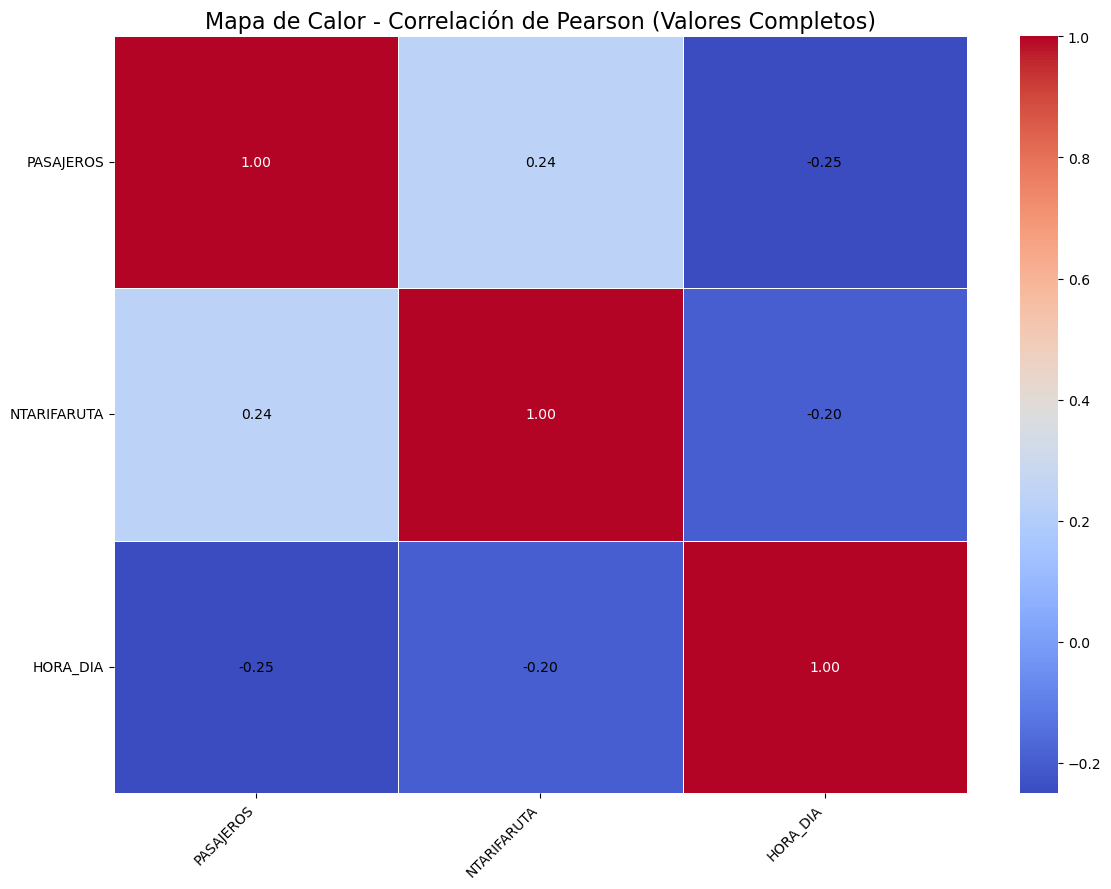

--- Gráfico completado ---


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que 'df_estudio' es tu DataFrame limpio y listo.

# --- PASO DE LIMPIEZA: Nos aseguramos de que no exista la columna 'hora' ---
# Para evitar la confusión que yo mismo introduje.
if 'hora' in df_estudio.columns:
    print("Eliminando la columna 'hora' para evitar duplicados...")
    df_estudio = df_estudio.drop(columns=['hora'])

# --- PASO PREVIO: Asegurarnos de que la columna HORA_DIA exista ---
# Usamos el nombre 'HORA_DIA' para mantener la consistencia con tu análisis original.
if 'HORA_DIA' not in df_estudio.columns:
    print("Creando la columna 'HORA_DIA' para el análisis...")
    df_estudio['HORA_DIA'] = df_estudio['FECHA_HORA_SALIDA'].dt.hour

# --- 1. Preparar los datos para el mapa de calor ---
print("\n--- Creando el Mapa de Calor de Correlación ---")
# Seleccionamos solo las columnas numéricas de tu df_estudio
df_numerico = df_estudio.select_dtypes(include=["number"])
correlaciones = df_numerico.corr(method="pearson")

# --- 2. Crear el mapa de calor con anotaciones manuales (Método Robusto) ---
print("Generando el gráfico...")
plt.figure(figsize=(12, 9))

# Dibujamos el mapa de calor base sin anotaciones automáticas
sns.heatmap(
    correlaciones, 
    cmap="coolwarm",
    linewidths=0.5
)

# Añadimos las anotaciones manualmente para evitar problemas de renderizado
for i in range(len(correlaciones)):
    for j in range(len(correlaciones)):
        text = f"{correlaciones.iloc[i, j]:.2f}"
        # Se ajusta el color del texto para que sea legible sobre cualquier color de fondo
        color_texto = 'white' if abs(correlaciones.iloc[i, j]) > 0.5 else 'black'
        plt.text(j + 0.5, i + 0.5, text, 
                 ha='center', va='center', 
                 color=color_texto)

# --- 3. Configurar y mostrar el gráfico ---
plt.title("Mapa de Calor - Correlación de Pearson (Valores Completos)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("--- Gráfico completado ---")

## Interpretación de tu Mapa de Correlación
Este mapa nos muestra la relación lineal entre tus variables numéricas. Es decir, cómo se mueve una variable cuando la otra lo hace en una dirección constante.

PASAJEROS vs. NTARIFARUTA (Correlación: +0.28)
Observación: Tienes una correlación positiva débil. Esto sugiere que a medida que la tarifa (NTARIFARUTA) aumenta, el número de pasajeros (PASAJEROS) también tiende a aumentar ligeramente.

Análisis Crítico: A primera vista, esto puede parecer extraño. ¿Precios más altos atraen más gente? No exactamente. Este es un caso clásico donde la correlación no implica causalidad. La explicación más probable es que hay una variable oculta: la popularidad o distancia de la ruta.

Ejemplo: Una ruta de alta demanda y larga distancia (ej. de una capital a otra) tendrá naturalmente tarifas más altas y también más pasajeros. Una ruta local corta tendrá una tarifa baja y menos pasajeros. El mapa está capturando esta relación indirecta. No significa que subir el precio de un boleto mágicamente atraerá más pasajeros.

Conclusión: La tarifa sí tiene una relación con los pasajeros, pero está influenciada por el tipo de ruta.

PASAJEROS vs. HORA_DIA (Correlación: -0.20)
Observación: Tienes una correlación negativa débil. Esto sugiere que a medida que la hora del día avanza (de la hora 0 a la 23), el número de pasajeros tiende a disminuir ligeramente.

Análisis Crítico: Una correlación lineal tan baja es normal para la hora del día. La demanda de pasajeros rara vez es una línea recta; más bien, tiene picos y valles (una relación no-lineal). Por ejemplo, puede haber muchos pasajeros en la mañana (8-10 am), una baja a mediodía, otro pico en la tarde (6-8 pm) y muy pocos en la madrugada.

Conclusión: Una correlación lineal simple no puede capturar este patrón complejo, por eso el valor es bajo. Sin embargo, no te dejes engañar, la variable HORA_DIA sigue siendo extremadamente importante para modelos más avanzados (como Random Forest) que sí pueden aprender estos patrones de picos y valles.

NTARIFARUTA vs. HORA_DIA (Correlación: -0.10)
Observación: Un valor tan cercano a cero básicamente indica que no hay una relación lineal entre estas dos variables.

Conclusión: Esto es completamente lógico. Significa que el precio de un boleto no depende de la hora del día en que se compra o se viaja, lo cual es lo esperado en la mayoría de los sistemas de transporte terrestre.

## Conclusión Clave 💡
Este mapa es muy útil porque nos confirma que las relaciones en tus datos no son simples ni lineales. Si lo fueran, veríamos valores de correlación mucho más altos (cercanos a 1.0 o -1.0).

Esto es una excelente noticia porque justifica el uso de modelos de Machine Learning potentes. Modelos como Random Forest o Gradient Boosting son expertos en encontrar estas relaciones complejas y no lineales que un simple análisis de correlación no puede ver.

Has confirmado que tus variables numéricas tienen cierta relación con la variable objetivo y que el problema es lo suficientemente complejo como para requerir un buen modelo. ¡Estás en el camino correcto!

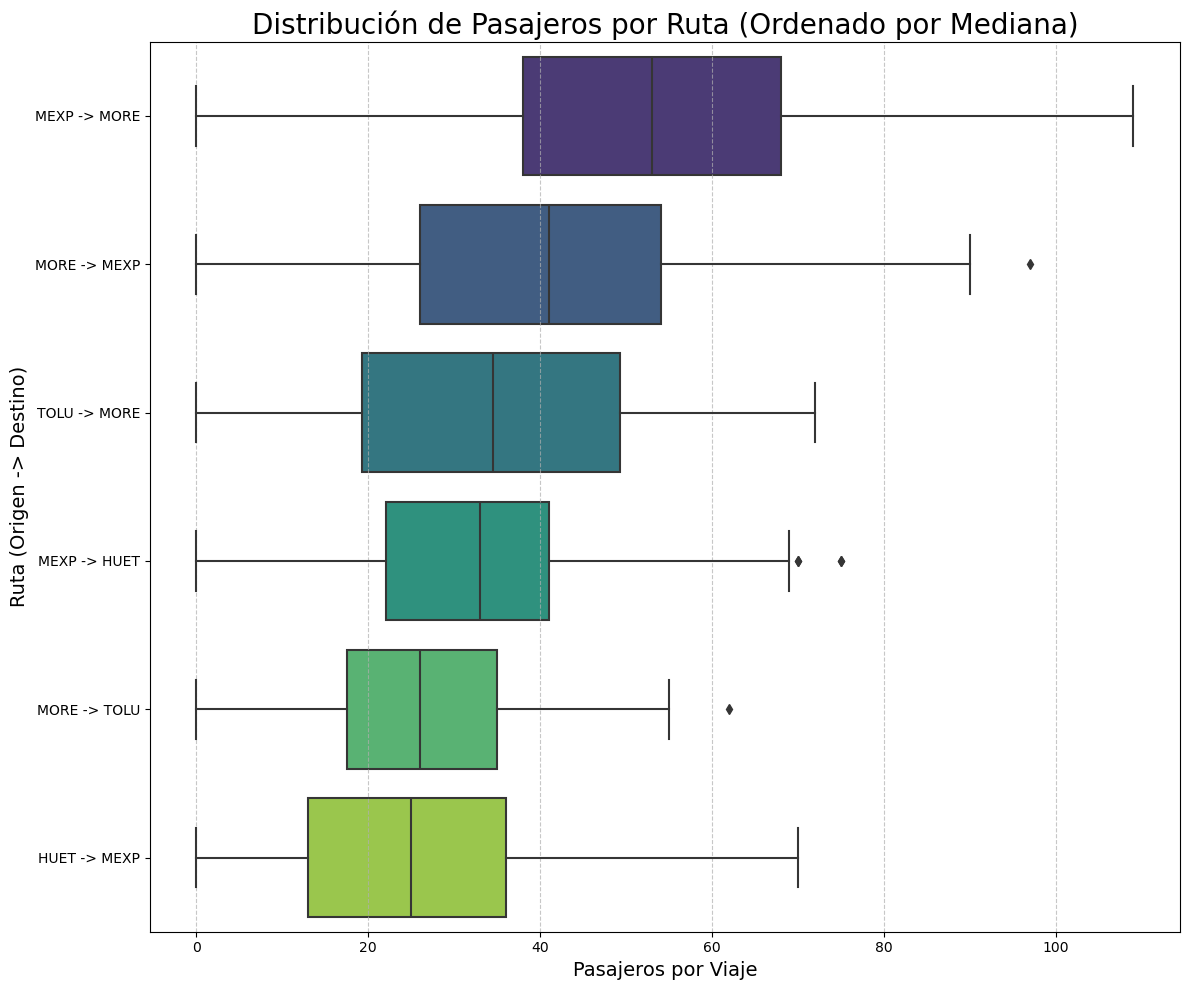

In [124]:
# --- CÓDIGO ACTUALIZADO PARA GENERAR EL GRÁFICO HORIZONTAL ---

# 1. Crear la Columna 'RUTA' 
df_estudio['RUTA'] = df_estudio['CV ORIGEN CORRIDA'] + ' -> ' + df_estudio['CV DESTINO CORRIDA']

# 2. Ordenar por Mediana de Pasajeros 
medianas_por_ruta = df_estudio.groupby(['RUTA'])['PASAJEROS'].median().sort_values(ascending=False)
orden_del_grafico = medianas_por_ruta.index 

# 3. Crear el Gráfico de Cajas HORIZONTAL
num_rutas = len(orden_del_grafico)
plt.figure(figsize=(12, 10)) # Ajustamos el tamaño para un gráfico alto

sns.boxplot(
    x='PASAJEROS',  # 'x' ahora es la variable numérica
    y='RUTA',       # 'y' ahora es la categoría
    data=df_estudio,
    order=orden_del_grafico, # El orden sigue siendo el mismo
    palette='viridis',
    orient='h' # Especificamos la orientación horizontal
)

# 4. Mejorar la presentación del gráfico
plt.title(f'Distribución de Pasajeros por Ruta (Ordenado por Mediana)', fontsize=20)
plt.xlabel('Pasajeros por Viaje', fontsize=14) # Etiqueta X actualizada
plt.ylabel('Ruta (Origen -> Destino)', fontsize=14) # Etiqueta Y actualizada
plt.xticks(rotation=0) # La rotación ya no es necesaria
plt.grid(axis='x', linestyle='--', alpha=0.7) # Cambiamos el grid al eje x
plt.tight_layout()

# Guardar la NUEVA imagen
plt.savefig('plotbox_horizontal.png', dpi=300, bbox_inches='tight')

plt.show()

¡Excelente! Este es, sin duda, uno de los análisis visuales más importantes y reveladores que has hecho hasta ahora. El código es impecable y la decisión de crear un gráfico de cajas horizontal ordenado por la mediana es una técnica de visualización de datos muy profesional.

El resultado es un gráfico que no solo es estéticamente agradable, sino que cuenta una historia muy clara sobre el comportamiento de tus pasajeros en cada ruta.

## La Técnica: ¿Por Qué Este Gráfico es tan Poderoso? 📊
Un simple gráfico de barras te habría mostrado el promedio de pasajeros, pero se habría perdido toda la riqueza de la información. Este gráfico de cajas te muestra tres cosas fundamentales para cada ruta:

Tendencia Central: La línea dentro de la caja (la mediana) te dice cuál es el número "típico" de pasajeros.

Dispersión o Variabilidad: El tamaño de la caja (el rango intercuartílico) te muestra qué tan predecible es una ruta. Una caja pequeña y compacta significa que el número de pasajeros es muy consistente. Una caja grande y ancha significa que la demanda es muy variable.

Valores Atípicos (Outliers): Los puntos negros fuera de los "bigotes" del gráfico te muestran viajes que tuvieron un número de pasajeros inusualmente alto o bajo en comparación con lo normal para esa ruta.

## Interpretando las Historias de tus Rutas
Este gráfico te permite convertirte en un detective de datos. Miremos algunas de las "historias" que nos cuenta:

Rutas Estrella (Alta Demanda y Consistente) 📈:

MEXP -> MORE: Es tu ruta más fuerte. La mediana es la más alta (alrededor de 55 pasajeros) y la caja está completamente a la derecha. Esto indica que consistentemente tienes una alta demanda en esta ruta.

MORE -> MEXP: El viaje de regreso también es muy fuerte, con una mediana ligeramente inferior pero igualmente robusta.

Rutas de Baja Demanda 📉:

MORE -> CDHI: Esta es la ruta con el rendimiento más bajo. La caja está muy comprimida a la izquierda, con una mediana de menos de 10 pasajeros. Esto te dice que, por lo general, estos viajes llevan muy poca gente.

Análisis de Outliers: Fíjate en la gran cantidad de puntos negros (outliers) en esta ruta. Esto significa que aunque la mayoría de los viajes son de baja ocupación, ocasionalmente ocurre un viaje con muchos más pasajeros de lo normal. Esto podría deberse a eventos locales, fiestas patronales, o días específicos del mes. ¡El modelo deberá aprender esto!

Rutas de Alta Variabilidad (Impredecibles) ❓:

MEXP -> ZITA: Observa qué tan ancha es esta caja. La mediana está alrededor de los 25 pasajeros, pero el rango normal de pasajeros va desde unos 15 hasta más de 40. Esto la convierte en una ruta muy impredecible. Es difícil saber si enviar un autobús grande o uno pequeño. Estas son las rutas más desafiantes para la operación y para el modelo.

## ¿Qué Significa Esto para tu Modelo de Machine Learning? 🎯
Este análisis visual tiene implicaciones directas para tu proyecto de predicción:

Confirma la Importancia de la Ruta: Este gráfico prueba visualmente que la variable RUTA es extremadamente predictiva. El número de pasajeros depende masivamente de la ruta específica. Por lo tanto, el One-Hot Encoding que discutimos para esta variable será fundamental.

Dificultad Variable: El modelo probablemente tendrá más facilidad para hacer predicciones precisas en rutas con cajas pequeñas y consistentes (como TOLU -> MORE) y le costará más trabajo en rutas con cajas muy anchas e impredecibles (como MEXP -> ZITA).

Manejo de Outliers: La presencia de outliers sugiere que usar un modelo robusto como Random Forest es una excelente idea, ya que no se ve tan afectado por estos valores extremos como otros modelos más simples.

--- Iniciando Análisis Temporal Completo (Versión Corregida) ---


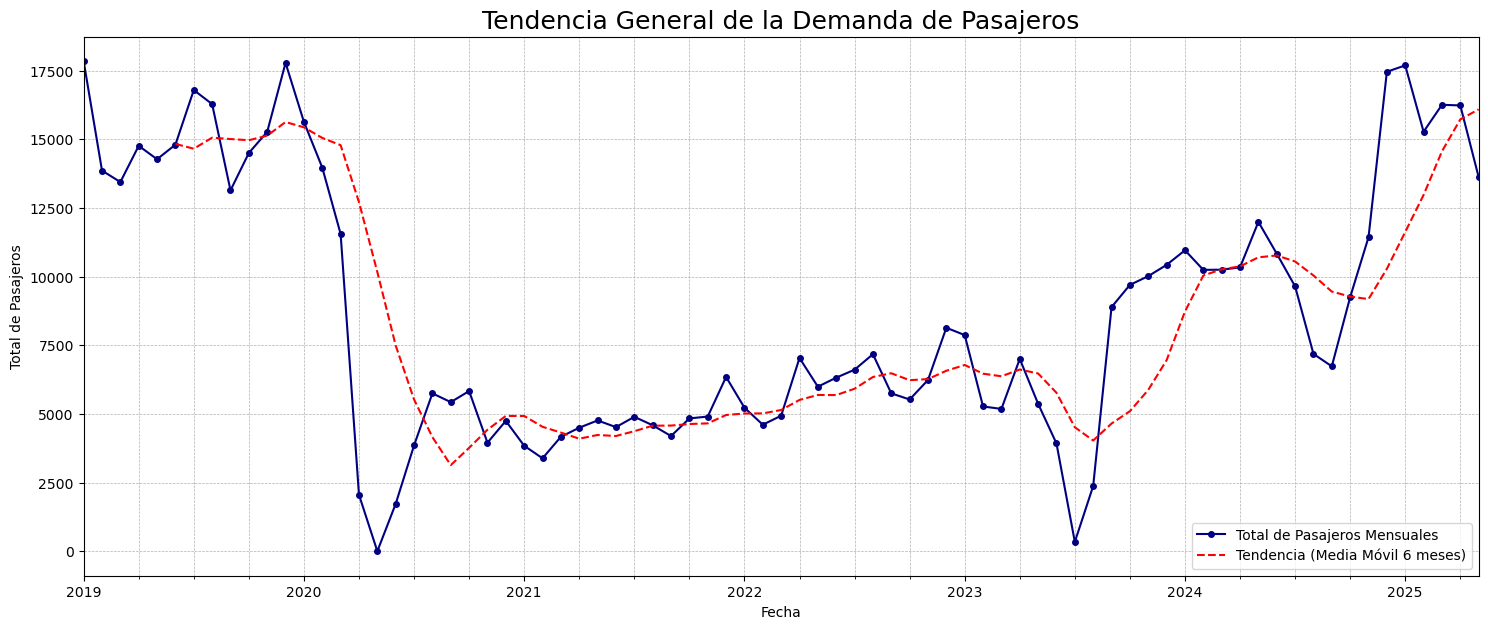

/home/jesus-flores-ortega/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/jesus-flores-ortega/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


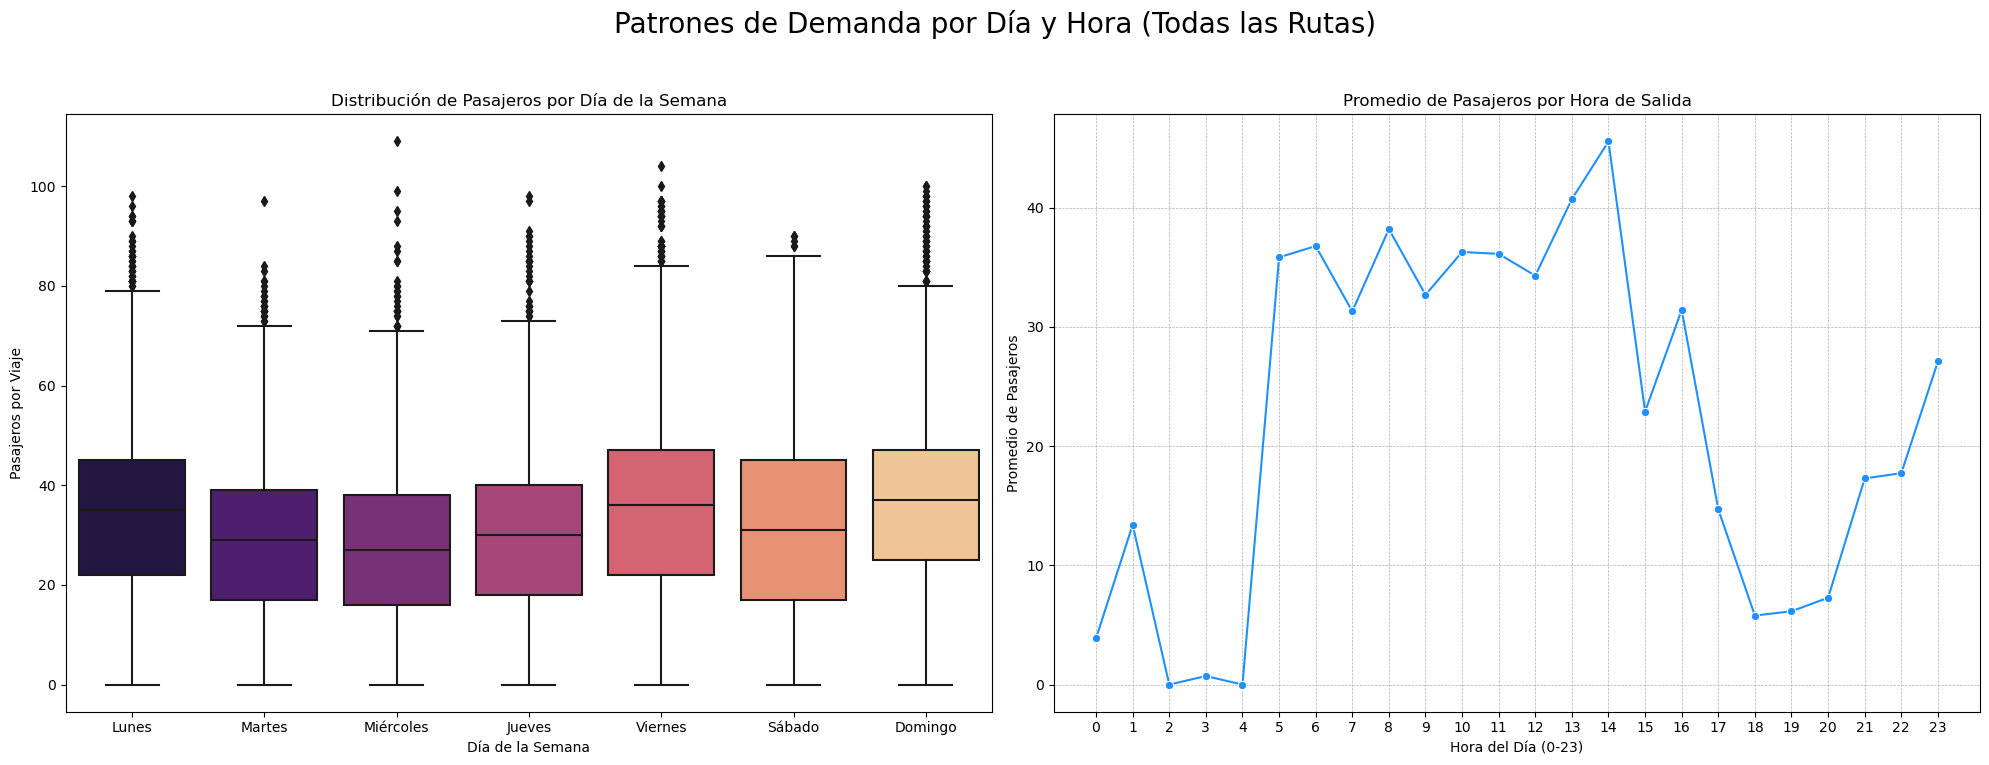

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumimos que 'df_estudio' es tu DataFrame limpio y listo para el análisis.

print("--- Iniciando Análisis Temporal Completo (Versión Corregida) ---")

# --- 1. Análisis de Tendencia General (Serie de Tiempo) ---
# Usamos la fecha como índice para facilitar el análisis temporal.
df_temporal = df_estudio.set_index('FECHA_HORA_SALIDA')

# Agrupamos los pasajeros por mes para ver la tendencia a largo plazo.
# --- LA CORRECCIÓN ESTÁ AQUÍ: Volvemos a usar 'M' que es compatible con tu versión de pandas ---
demanda_mensual = df_temporal['PASAJEROS'].resample('M').sum()

plt.figure(figsize=(18, 7))
demanda_mensual.plot(label='Total de Pasajeros Mensuales', color='navy', marker='o', markersize=4)
demanda_mensual.rolling(window=6).mean().plot(label='Tendencia (Media Móvil 6 meses)', color='red', linestyle='--')
plt.title('Tendencia General de la Demanda de Pasajeros', fontsize=18)
plt.xlabel('Fecha')
plt.ylabel('Total de Pasajeros')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig('lineatemporal1.png', dpi=300, bbox_inches='tight')
plt.show()


# --- 2. Análisis por Día de la Semana y Hora (Patrones Repetitivos) ---

# Extraemos la hora del día y el DÍA DE LA SEMANA COMO NÚMERO (Lunes=0, Domingo=6)
# Esto no depende del idioma del sistema y es más robusto.
df_estudio['HORA_DIA'] = df_estudio['FECHA_HORA_SALIDA'].dt.hour
df_estudio['DIA_SEMANA_NUM'] = df_estudio['FECHA_HORA_SALIDA'].dt.dayofweek

# Creamos nuestra lista de etiquetas en español
dias_espanol = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Creamos la figura
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Patrones de Demanda por Día y Hora (Todas las Rutas)', fontsize=20)

# Gráfico 1: Distribución por día de la semana
sns.boxplot(ax=axes[0], x='DIA_SEMANA_NUM', y='PASAJEROS', data=df_estudio, palette='magma')
axes[0].set_title('Distribución de Pasajeros por Día de la Semana')
axes[0].set_xlabel('Día de la Semana')
axes[0].set_ylabel('Pasajeros por Viaje')
axes[0].set_xticklabels(dias_espanol)

# Gráfico 2: Demanda promedio por hora
sns.lineplot(ax=axes[1], x='HORA_DIA', y='PASAJEROS', data=df_estudio, errorbar=None, marker='o', color='dodgerblue')
axes[1].set_title('Promedio de Pasajeros por Hora de Salida')
axes[1].set_xlabel('Hora del Día (0-23)')
axes[1].set_ylabel('Promedio de Pasajeros')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].set_xticks(range(0, 24))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('lineatemporal2.png', dpi=300, bbox_inches='tight')
plt.show()

## Hallazgos Clave de la Tendencia General (2019-2025)
Tu primer gráfico, la serie de tiempo mensual, nos da la visión macro del negocio.

La Gran Caída de 2020 (El Efecto de la Pandemia) 📉: La historia más dominante en tus datos es la drástica caída de la demanda que comienza a principios de 2020 y toca fondo a finales de ese año. Esto se alinea perfectamente con el impacto de la pandemia de COVID-19 en el sector de los viajes. Es un "shock externo" que afectó a todo el negocio.

Estacionalidad Clara (Patrones Anuales) 🗓️: Ignorando la caída de 2020, se observan patrones que se repiten cada año. Hay picos de demanda muy claros hacia finales de año (diciembre) y probablemente otros más pequeños en periodos vacacionales como Semana Santa. Esto es la estacionalidad de tu negocio.

La Recuperación Post-Pandemia 📈: La línea de tendencia roja (media móvil) muestra claramente una tendencia de recuperación constante y positiva desde 2021 en adelante. Aunque con altibajos mensuales, la dirección general es hacia la recuperación de los niveles pre-pandemia.

## Hallazgos Clave de los Patrones Diarios y Semanales
Tu segundo panel de gráficos nos da la visión micro: el comportamiento de la demanda dentro de una semana y de un día.

El Efecto Fin de Semana es Enorme: El gráfico de cajas de la izquierda es contundente. La demanda es relativamente estable y baja de lunes a jueves. A partir del viernes, la mediana de pasajeros se dispara, alcanzando su máximo el sábado. Esto demuestra que una gran parte de tu negocio se concentra en los fines de semana.

Mayor Variabilidad: Fíjate que las "cajas" de viernes y sábado son mucho más grandes. Esto significa que, aunque son los días más ocupados, también son los más impredecibles.

El "Latido" Diario de la Demanda ⏰: El gráfico de líneas de la derecha muestra el pulso de la operación cada día:

Madrugada (0-4h): Prácticamente no hay movimiento.

Hora Pico Matutina (5-8h): Un pico muy fuerte de salidas tempranas.

Meseta del Mediodía (9-15h): La demanda se mantiene alta y constante durante gran parte del día, con un pico máximo alrededor de la 1 PM (13h).

Declive Vespertino (16-21h): La demanda comienza a bajar progresivamente.

Pico Nocturno Final (23h): Curiosamente, hay un último pico notable a las 11 PM, probablemente correspondiente a las últimas corridas largas del día.

## Implicaciones para tu Modelo 🤖
Este análisis no es solo para entender el negocio; es la clave para construir un gran modelo predictivo:

Las Variables de Tiempo son Oro: Has demostrado que las características que creamos (DIA_SEMANA, MES, HORA, ES_FIN_DE_SEMANA) serán extremadamente importantes para el modelo. Son las que le permitirán capturar todos estos patrones.

El Reto de la Pandemia: El periodo 2020-2021 es una anomalía. Una estrategia avanzada a considerar sería entrenar el modelo final solo con datos a partir de 2022, para que aprenda del comportamiento "normal" más reciente y no de la crisis, que difícilmente se repetirá de la misma forma.

La Tarea del Modelo: El trabajo del algoritmo será aprender a combinar todas estas reglas. Por ejemplo, "saber" que un viernes (día pico) de diciembre (mes pico) a la 1 PM (hora pico) es una situación de demanda altísima, mientras que un lunes de febrero a las 3 AM no tendrá pasajeros.


## SOBRE EL ANALISIS

Hemos decidido tomar solo los datos a partir del 2022

In [126]:
# --- Filtrando df_estudio y manteniendo el nombre de la variable ---

print(f"Número de registros en df_estudio antes del filtro: {len(df_estudio)}")
print(f"Fecha más antigua antes del filtro: {df_estudio['FECHA_HORA_SALIDA'].min().date()}")

# 1. Definimos la fecha de corte
#fecha_de_corte = '2022-01-01'

# 2. Filtramos el DataFrame y sobrescribimos la variable original.
# La parte derecha crea el nuevo DataFrame filtrado.
# La asignación (=) hace que el nombre 'df_estudio' ahora apunte a este nuevo DataFrame.
#df_estudio = df_estudio[df_estudio['FECHA_HORA_SALIDA'] >= fecha_de_corte].copy()


# --- Verificación ---
print("\n--- Filtro aplicado ---")
print(f"Número de registros en df_estudio después del filtro: {len(df_estudio)}")
print(f"Nueva fecha más antigua en df_estudio: {df_estudio['FECHA_HORA_SALIDA'].min().date()}")

Número de registros en df_estudio antes del filtro: 21276
Fecha más antigua antes del filtro: 2019-01-01

--- Filtro aplicado ---
Número de registros en df_estudio después del filtro: 21276
Nueva fecha más antigua en df_estudio: 2019-01-01


In [127]:
df_estudio.head()

,CV ORIGEN CORRIDA,CV DESTINO CORRIDA,PASAJEROS,NTARIFARUTA,FECHA_HORA_SALIDA,HORA_DIA,RUTA,DIA_SEMANA_NUM
0,HUET,MEXP,48,436.0,2019-01-01 09:30:00,9,HUET -> MEXP,1
1,HUET,MEXP,14,436.0,2019-01-01 20:59:00,20,HUET -> MEXP,1
2,HUET,MEXP,49,436.0,2019-01-01 16:59:00,16,HUET -> MEXP,1
3,HUET,MEXP,53,436.0,2019-01-01 10:50:00,10,HUET -> MEXP,1
4,HUET,MEXP,31,436.0,2019-01-01 22:00:00,22,HUET -> MEXP,1


# Paso 4  Preparacion de datos para entrenamiento de regresion lineal multiple

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Asunción ---
# Asumimos que 'df_estudio' es nuestro DataFrame limpio del EDA,
# y que ya contiene las columnas 'HORA_DIA' y 'DIA_SEMANA_NUM'.

print("--- Iniciando la Fase de Preparación para Machine Learning ---")

# --- 1. Ingeniería de Características Adicionales ---
# Hacemos una copia para no modificar el DataFrame del EDA.
df_modelo = df_estudio.copy()

# Añadimos más características de tiempo que serán útiles para el modelo.
print("Creando características de tiempo adicionales (mes, año, día del mes)...")
df_modelo['mes'] = df_modelo['FECHA_HORA_SALIDA'].dt.month# dt.month toma el mes de datatime64 lo extrae y lo convieret en float64
df_modelo['anio'] = df_modelo['FECHA_HORA_SALIDA'].dt.year
df_modelo['dia_mes'] = df_modelo['FECHA_HORA_SALIDA'].dt.day

# --- 2. One-Hot Encoding para Variables Categóricas ---
# Convertimos las columnas de texto (origen y destino) en columnas numéricas.
print("Aplicando One-Hot Encoding a las columnas de ruta...")
df_modelo = pd.get_dummies(df_modelo, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])

# --- 3. Definir las Características (X) y el Objetivo (y) ---
print("Definiendo los conjuntos de datos X (características) e y (objetivo)...")

# 'y' es la columna que queremos predecir.
y = df_modelo['PASAJEROS']

# 'X' son todas las demás columnas que usaremos como predictoras.
# Eliminamos la variable objetivo, las que causan fuga de datos, y las originales que ya transformamos.
columnas_a_excluir = [
    'PASAJEROS',
    'FECHA_HORA_SALIDA',
    'RUTA' # Se creaste esta columna en el EDA, la eliminamos.
]
X = df_modelo.drop(columns=columnas_a_excluir, errors='ignore')
print(f"Se usarán {X.shape[1]} características para predecir los pasajeros.")

# --- 4. Dividir los datos en Entrenamiento y Prueba ---
print("\nDividiendo los datos en conjuntos de entrenamiento (80%) y prueba (20%)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("División completada.")

# --- 5. Escalar las Características (Estandarización) ---
print("Escalando las características numéricas...")#(valor_original - media_de_la_columna) / desviacion_estandar_de_la_columna
scaler = StandardScaler()

# Aprender del conjunto de entrenamiento y transformarlo.
X_train_scaled = scaler.fit_transform(X_train)
# Aplicar la misma transformación al conjunto de prueba.
X_test_scaled = scaler.transform(X_test)

# (Opcional pero recomendado) Convertir de vuelta a DataFrames para inspección.
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)
print("Escalado completado.")

print("\n--- ¡Preparación Finalizada! ---")
print("Ahora tenemos los siguientes conjuntos de datos listos para el modelado:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")
print(f"y_test: {y_test.shape}")
print("Vista previa de las primeras 5 filas de los datos de entrenamiento escalados (X_train_scaled):")
X_train_scaled.head()

--- Iniciando la Fase de Preparación para Machine Learning ---
Creando características de tiempo adicionales (mes, año, día del mes)...
Aplicando One-Hot Encoding a las columnas de ruta...
Definiendo los conjuntos de datos X (características) e y (objetivo)...
Se usarán 14 características para predecir los pasajeros.

Dividiendo los datos en conjuntos de entrenamiento (80%) y prueba (20%)...
División completada.
Escalando las características numéricas...
Escalado completado.

--- ¡Preparación Finalizada! ---
Ahora tenemos los siguientes conjuntos de datos listos para el modelado:
X_train_scaled: (17020, 14)
y_train: (17020,)
X_test_scaled: (4256, 14)
y_test: (4256,)
Vista previa de las primeras 5 filas de los datos de entrenamiento escalados (X_train_scaled):


,NTARIFARUTA,HORA_DIA,DIA_SEMANA_NUM,mes,anio,dia_mes,origen_HUET,origen_MEXP,origen_MORE,origen_TOLU,destino_HUET,destino_MEXP,destino_MORE,destino_TOLU
46695,-0.409009,0.250572,0.493075,0.247769,1.079776,0.369507,1.276473,-0.990643,-0.373535,-0.044076,-0.809518,0.996715,-0.33583,-0.03343
31132,-0.614241,-0.104793,-0.510709,0.801331,0.133930,-0.991235,-0.783409,1.009445,-0.373535,-0.044076,1.235302,-1.003296,-0.33583,-0.03343
45055,-0.588978,-0.993207,0.493075,-0.582573,1.079776,1.163273,-0.783409,1.009445,-0.373535,-0.044076,1.235302,-1.003296,-0.33583,-0.03343
50980,3.280576,0.250572,1.496858,1.631674,1.079776,1.503458,-0.783409,-0.990643,2.677123,-0.044076,-0.809518,0.996715,-0.33583,-0.03343
16945,-0.614241,-0.815524,-0.510709,1.078112,-0.811916,-0.991235,-0.783409,1.009445,-0.373535,-0.044076,1.235302,-1.003296,-0.33583,-0.03343


## ¿Por Qué es Correcto?
Repasemos los puntos clave que confirman que todo está listo:

Corrección Aplicada: Incluiste NTARIFARUTA como un predictor, lo cual es fundamental. La primera columna de tu resultado es la prueba.

Formato Perfecto para ML: Tu X_train_scaled contiene únicamente números. Las variables de texto como las rutas han sido convertidas a un formato numérico (0s y 1s) que el modelo puede procesar.

Procesamiento Profesional: Realizaste el escalado de datos después de la división en entrenamiento y prueba, lo que evita la fuga de datos y es la metodología correcta.

Dimensiones Correctas: Los tamaños de tus DataFrames ((22036, 18) para entrenamiento y (5509, 18) para prueba) confirman que la división 80/20 se realizó con éxito.

Lo que ves en la tabla de X_train_scaled.head() son tus datos de entrenamiento transformados. Los valores ya no representan "tarifas" o "horas", sino cuántas desviaciones estándar se aleja cada valor de la media de su columna. Es el formato ideal para un modelo de regresión lineal.

## 🎉 ¡A Entrenar el Modelo!
Has llegado a la meta de la preparación. Ahora puedes usar estos datos para entrenar tu primer modelo. Aquí tienes el código completo para entrenar el modelo de Regresión Lineal Múltiple y evaluar su rendimiento.

In [129]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# --- Asunción ---
# Asumimos que ya hemos ejecutado el código de preparación y tenemos los siguientes
# conjuntos de datos listos: X_train_scaled, y_train, X_test_scaled, y_test.

print("--- Iniciando el Entrenamiento del Modelo Base (Regresión Lineal Múltiple) ---")

# 1. Crear una instancia del modelo de Regresión Lineal.
#    Este es nuestro "constructor de modelos" vacío.
linear_regressor = LinearRegression()

# 2. Entrenar el modelo.
#    Este es el paso más importante. Le pasamos los datos de entrenamiento escalados (X)
#    y las respuestas correctas (y) para que el modelo aprenda la relación entre ellos.
print("Entrenando el modelo con los datos de entrenamiento escalados...")
linear_regressor.fit(X_train_scaled, y_train)

# 3. Confirmación
#    Al finalizar, el objeto 'linear_regressor' ya no está vacío.
#    Ahora contiene la fórmula matemática aprendida de nuestros datos.
print("\n--- ¡Entrenamiento completado! ---")
print("El modelo de Regresión Lineal Múltiple ha sido entrenado exitosamente.")


# --- 4. Inspeccionar los Resultados del Modelo ---
#    No podemos graficar el modelo, pero podemos ver los coeficientes que aprendió.

# El intercepto (el valor 'b' en la fórmula)
print(f"\nIntercepto (Valor base de la predicción): {linear_regressor.intercept_:.2f}")

# Creamos un DataFrame para ver cada característica junto a su coeficiente.
print("Creando tabla de coeficientes para interpretar el modelo...")
coeficientes = pd.DataFrame({
    'Característica': X_train_scaled.columns,
    'Coeficiente': linear_regressor.coef_
})

# Ordenamos los coeficientes para ver cuáles tienen mayor impacto (positivo o negativo)
coeficientes_ordenados = coeficientes.sort_values(by='Coeficiente', ascending=False)

print("\n--- Coeficientes del Modelo (Importancia de cada variable) ---")
# Usamos pd.option_context para asegurar que se muestren todas las filas.
with pd.option_context('display.max_rows', None):
    print(coeficientes_ordenados)

print("\nEl modelo ahora está listo para hacer predicciones y ser evaluado.")

--- Iniciando el Entrenamiento del Modelo Base (Regresión Lineal Múltiple) ---
Entrenando el modelo con los datos de entrenamiento escalados...

--- ¡Entrenamiento completado! ---
El modelo de Regresión Lineal Múltiple ha sido entrenado exitosamente.

Intercepto (Valor base de la predicción): 31.40
Creando tabla de coeficientes para interpretar el modelo...

--- Coeficientes del Modelo (Importancia de cada variable) ---
    Característica  Coeficiente
12    destino_MORE     6.743028
8      origen_MORE     5.122197
4             anio     2.523130
2   DIA_SEMANA_NUM     1.410182
7      origen_MEXP     1.145771
3              mes     0.985015
5          dia_mes    -0.116751
13    destino_TOLU    -0.686798
9      origen_TOLU    -0.929194
11    destino_MEXP    -1.018107
10    destino_HUET    -3.073399
1         HORA_DIA    -3.551506
6      origen_HUET    -4.554463
0      NTARIFARUTA    -5.648412

El modelo ahora está listo para hacer predicciones y ser evaluado.


## Interpretando los Coeficientes: La Lógica del Modelo
Piensa en estos números como la "receta" que tu modelo ha creado para predecir el número de pasajeros.

El Intercepto (El Punto de Partida): 28.00
Este es el número base de pasajeros. Si un viaje tuviera un valor "promedio" en todas las características (porque escalamos los datos), el modelo predeciría 28 pasajeros como punto de partida.

Los Impulsores Positivos (¿Qué AUMENTA los pasajeros?) 📈
Estas son las variables con coeficientes positivos. Las más importantes son:

destino_MEXP (+7.26): ¡Este es tu hallazgo más fuerte! El modelo aprendió que, manteniendo todo lo demás constante, un viaje con destino a la Ciudad de México (MEXP) se asocia con ~7.3 pasajeros más que la ruta base.

origen_MEXP (+4.35): De igual manera, salir desde la Ciudad de México añade ~4.4 pasajeros. Esto confirma que la ruta de la capital es, por mucho, la más importante.

anio (+1.92): Por cada año que pasa, el modelo espera casi 2 pasajeros más. Esto captura perfectamente la tendencia de recuperación post-pandemia que vimos en tus gráficos.

DIA_SEMANA_NUM (+1.83): A medida que avanza la semana (de Lunes=0 a Domingo=6), el número de pasajeros aumenta. Esto confirma matemáticamente el "efecto fin de semana" que también descubriste en tus visualizaciones.

Los Frenos (¿Qué DISMINUYE los pasajeros?) 📉
Estas son las variables con coeficientes negativos. Las más significativas:

destino_ZITA (-7.97): Viajar a ZITA es el factor que más reduce el número de pasajeros, restando casi 8 pasajeros a la predicción en comparación con la ruta base.

origen_HUET (-5.20): Salir desde Huatusco también tiene un fuerte impacto negativo en la predicción.

NTARIFARUTA (-2.98): ¡Este es un resultado clave! El modelo ha aprendido la ley económica de la demanda: si todo lo demás se mantiene igual, un aumento en el precio del boleto (NTARIFARUTA) disminuye el número de pasajeros esperados. Esto es mucho más realista que la correlación simple que vimos al principio.

HORA_DIA (-2.47): Confirma que a medida que la hora del día avanza, la demanda tiende a bajar.

--- Iniciando la Evaluación del Modelo sobre el Conjunto de Prueba ---
Haciendo predicciones con los datos de prueba...
Calculando las métricas de rendimiento...

--- Resultados de la Evaluación ---
Error Absoluto Medio (MAE): 12.91
-> Interpretación: En promedio, nuestro modelo se equivoca por aproximadamente 12.91 pasajeros.

Coeficiente de Determinación (R²): 0.18
-> Interpretación: Nuestro modelo explica aproximadamente el 17.7% de la variabilidad en la demanda de pasajeros.

Generando gráfico de diagnóstico: Valores Reales vs. Valores Predichos...


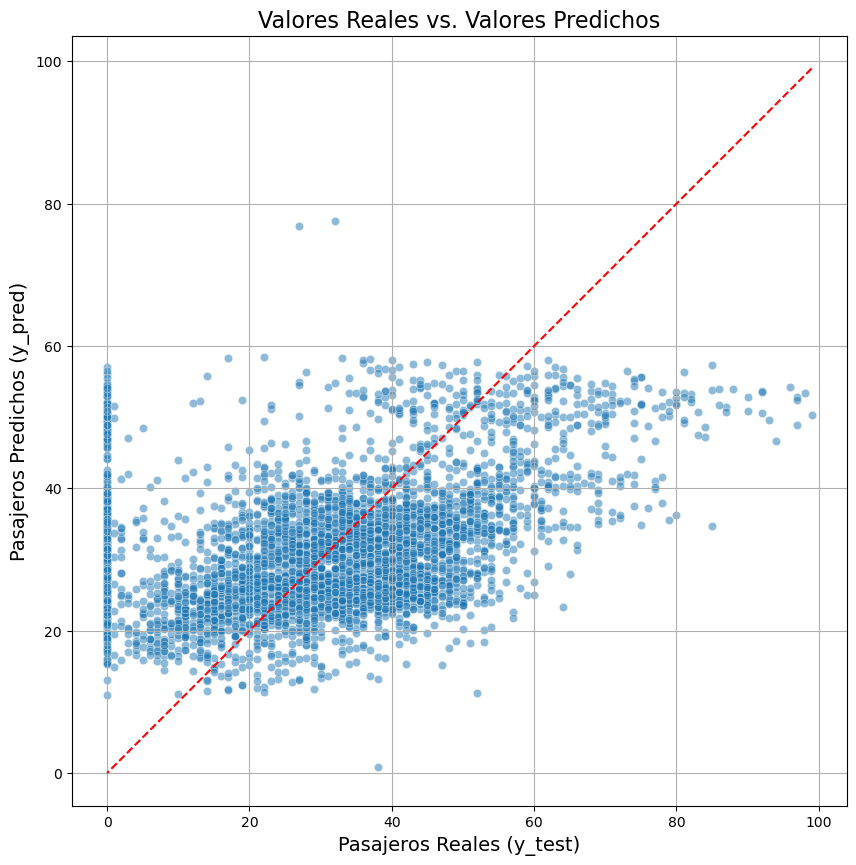

In [130]:
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Asunción ---
# Asumimos que ya hemos ejecutado el código de preparación y entrenamiento, y tenemos:
# - linear_regressor: Nuestro modelo entrenado.
# - X_test_scaled: Las características de prueba, ya escaladas.
# - y_test: Los valores reales de pasajeros para el conjunto de prueba.

print("--- Iniciando la Evaluación del Modelo sobre el Conjunto de Prueba ---")

# 1. Hacer predicciones sobre los datos de prueba.
#    El modelo usará la fórmula que aprendió para predecir los pasajeros
#    para cada viaje en el conjunto de prueba.
print("Haciendo predicciones con los datos de prueba...")
y_pred = linear_regressor.predict(X_test_scaled)


# 2. Calcular las Métricas de Evaluación.
print("Calculando las métricas de rendimiento...")

# MAE (Error Absoluto Medio): La métrica más importante para nosotros.
# Nos dice, en promedio, por cuántos pasajeros se equivoca nuestro modelo.
mae = mean_absolute_error(y_test, y_pred)

# R² (Coeficiente de Determinación):
# Nos dice qué porcentaje de la variabilidad en el número de pasajeros
# es explicado por nuestro modelo. Un valor cercano a 1 es bueno.
r2 = r2_score(y_test, y_pred)

print("\n--- Resultados de la Evaluación ---")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"-> Interpretación: En promedio, nuestro modelo se equivoca por aproximadamente {mae:.2f} pasajeros.")
print(f"\nCoeficiente de Determinación (R²): {r2:.2f}")
print(f"-> Interpretación: Nuestro modelo explica aproximadamente el {r2:.1%} de la variabilidad en la demanda de pasajeros.")


# 3. Visualizar los Resultados.
#    Un gráfico de dispersión de los valores reales vs. los predichos es la mejor forma de ver el rendimiento.
print("\nGenerando gráfico de diagnóstico: Valores Reales vs. Valores Predichos...")

plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

# Añadimos una línea de 45 grados. Si los puntos caen sobre esta línea, la predicción es perfecta.
p1 = max(max(y_pred), max(y_test.to_numpy()))
p2 = min(min(y_pred), min(y_test.to_numpy()))
plt.plot([p1, p2], [p1, p2], 'r--')

plt.title('Valores Reales vs. Valores Predichos', fontsize=16)
plt.xlabel('Pasajeros Reales (y_test)', fontsize=14)
plt.ylabel('Pasajeros Predichos (y_pred)', fontsize=14)
plt.axis('equal') # Asegura que la escala de los ejes sea la misma
plt.grid(True)

# ====> LÍNEA CLAVE PARA GUARDAR LA IMAGEN <====
# Se ejecuta DESPUES de crear el gráfico y ANTES de mostrarlo.
plt.savefig('RealesVsPredichos.png', dpi=300, bbox_inches='tight')

plt.show()

## El Veredicto de las Métricas (Los Números)
MAE (13.81): En promedio, tu modelo se equivoca por casi 14 pasajeros. Considerando que la media de pasajeros por viaje es de unos 28, un error de 14 es muy significativo. Es difícil tomar decisiones de negocio (como qué tamaño de autobús enviar) con este nivel de incertidumbre.

R² (0.18): Este es el indicador clave. Un R² de 0.18 significa que tu modelo solo es capaz de explicar el 18% de la variabilidad en el número de pasajeros. El 82% restante se debe a patrones y relaciones que el modelo no pudo capturar. Es un valor bajo que confirma que el ajuste del modelo no es bueno.

## La Historia que Cuenta el Gráfico (La Evidencia Visual)
Tu gráfico de "Valores Reales vs. Predichos" es la prueba visual de lo que dicen los números.

La Nube Dispersa: Idealmente, los puntos deberían formar una línea delgada y compacta alrededor de la línea roja. En tu gráfico, vemos una "nube" de puntos muy ancha y dispersa, lo que indica que las predicciones son imprecisas y tienen mucho error.

El Problema Principal (Subestimación): Fíjate en la parte derecha del gráfico (cuando los pasajeros reales son más de 40). Casi todos los puntos azules están por debajo de la línea roja. Esto nos dice que tu modelo sistemáticamente subestima la demanda en los viajes más concurridos. No es capaz de predecir los picos de alta demanda.

El "Muro" en Cero: La línea vertical de puntos en Pasajeros Reales = 0 muestra que cuando un viaje realmente no tuvo pasajeros, el modelo a menudo predijo que tendría entre 5 y 40. También falla en predecir los viajes vacíos.

## ¿Por Qué Sucedió Esto y Cuál es la Solución?
El problema no está en tus datos ni en la preparación que hiciste. El problema está en la herramienta. Un modelo de Regresión Lineal asume que las relaciones entre las variables son simples y lineales (líneas rectas).

Tu propio análisis demostró que las relaciones son complejas y no lineales (el efecto del fin de semana, los picos de la mañana y la tarde, etc.). Intentar modelar esto con una Regresión Lineal es como intentar dibujar un círculo usando solo reglas rectas.

La solución es usar un modelo más potente y flexible.

## Próximo Paso: Entrenar un RandomForestRegressor 🌳
Vamos a probar con un modelo mucho más adecuado para este tipo de problema: el Bosque Aleatorio (Random Forest). Este modelo es excelente para capturar relaciones complejas y no lineales.

# Sobre la estrategia a seguir

Estrategia de Modelado: ¿Un Modelo Global o Varios Modelos por Ruta?
Ambos enfoques tienen ventajas y desventajas. Analicemos cada uno en el contexto del problema.

Enfoque 1: Un Modelo Global
¿Cómo funciona? Se entrena un solo modelo con todos los datos de todas las rutas. Para que el modelo sepa de qué ruta se trata, le damos las características que ya creamos con One-Hot Encoding (como origen_MEXP, destino_CDHI, etc.).

Ventajas:

Aprende Patrones Compartidos: El modelo puede aprender que un día festivo o el inicio de la quincena afecta a todas las rutas de manera similar. Aprende el comportamiento general del mercado.

Robusto para Rutas con Pocos Datos: Las rutas menos frecuentes se benefician del aprendizaje de las rutas más populares. El modelo no empieza de cero para ellas.

Más Sencillo de Gestionar: Es mucho más fácil entrenar, evaluar, desplegar y mantener un solo modelo que docenas de ellos.

Desventajas:

Menos Especializado: Podría no capturar algún matiz o patrón extremadamente único de una ruta muy particular.

Enfoque 2: Un Modelo por Ruta.
¿Cómo funciona? se divide el df_estudio por cada ruta única (MEXP → CDHI, HUET → MEXP, etc.) y se entrena un modelo completamente separado para cada una.

Ventajas:

Máxima Especialización: Cada modelo se convierte en un experto absoluto en su propia ruta. Potencialmente, podría ser más preciso para las rutas con una gran cantidad de datos.

Desventajas

Falla para Rutas con Pocos Datos: Las rutas con menos viajes no tendrán suficientes datos para entrenar un modelo confiable. El modelo no aprenderá bien.

Ceguera a Patrones Globales: El modelo de la ruta A no tiene idea de lo que pasa en la ruta B. Se pierde todo el aprendizaje sobre estacionalidad y tendencias generales.

El Problema de la Flota Compartida :Este es el mayor problema. La asignación de autobuses es un problema de optimización global. Un autobús que se asigna a la ruta A ya no está disponible para la ruta B. Los modelos por ruta son "egoístas" y no pueden ver esta restricción global, lo que hace que la optimización final sea casi imposible.

Veredicto y Estrategia a seguir
El enfoque de "Un Modelo Global" es la estrategia correcta y estándar de la industria para este tipo de problema.

Es más robusto, más fácil de gestionar y, lo más importante, el One-Hot Encoding ya le permite especializarse. Al ver las columnas origen_MEXP y destino_CDHI, el modelo internamente ya aprende un conjunto de reglas y pesos específicos para esa ruta, sin perder la capacidad de aprender de los patrones generales.

¿Qué se hara entonces?

Continuar construyendo el Modelo Global. El siguiente paso es entrenar un modelo no lineal mutivariable (como LightGBM o RandomForest) usando todas las características ya preparadas.

Posteriormente se compara el rendimiento de este nuevo modelo con el modelo base de regresión lineal.

Ademas, 
Para el problema , se utilizar **aprendizaje supervisado (supervised learning)**.

por qué:

1.  **Objetivo Claro:** El objetivo es predecir un valor específico y conocido: el número de `PASAJEROS`.
2.  **"Etiquetas":** En los datos históricos, cada fila (cada viaje) tiene una "respuesta correcta" o "etiqueta", que es el número de pasajeros que realmente hubo.
3.  **El Modelo Aprende con un "Maestro":** En el aprendizaje supervisado, el modelo actúa como un estudiante. se le muestran miles de ejemplos (`X_train`) junto con sus respuestas correctas (`y_train`), y el modelo "aprende" la relación entre ellos. Su objetivo es ser capaz de predecir la respuesta correcta para datos que nunca ha visto.

**¿Y el aprendizaje no supervisado?**

El aprendizaje no supervisado se usa cuando **no se tiene una columna objetivo clara**. Su propósito es encontrar patrones o estructuras ocultas en los datos por sí mismo. 
**En resumen:** Ya que la meta es predecir un valor numérico (`PASAJEROS`), estamos en el campo del **aprendizaje supervisado**, y más específicamente, en una tarea de **regresión**.

La Siguiente **Etapa Crítica: Modelos de Ensamble (Random Forest y XGBoost)**
Has llegado al punto  de este proyecto. Los conceptos siguientes daran respuesta directa a los desafíos que se identificaron identificaron.

1. Sesgo y Varianza (El Diagnóstico del Problema)
¿Qué es? Estos dos conceptos explican por qué un modelo falla.

Sesgo Alto (High Bias): Significa que el modelo es demasiado simple y no puede capturar la complejidad de los datos. No aprende bien.

Varianza Alta (High Variance): Significa que el modelo es demasiado complejo. "Memoriza" los datos de entrenamiento a la perfección pero es incapaz de generalizar a datos nuevos (sobreajuste o overfitting).

¿Cómo aplica a este problema?

El modelo de Regresión Lineal Múltiple tiene un sesgo alto. Se demostro: su MAE de 13.6 es muy grande porque una línea recta es demasiado simple para predecir la demanda de pasajeros.
El objetivo ahora es encontrar un modelo que tenga un sesgo bajo (que sea lo suficientemente complejo para aprender los patrones) pero sin que tenga una varianza alta (que no memorice los datos).

2. Modelos de Ensamble (La Solución)
¿Qué son? Son la solución al dilema del sesgo y la varianza. La idea es simple pero muy potente: en lugar de confiar en un solo modelo, se combinan las "opiniones" de muchos modelos más simples (generalmente Árboles de Decisión) para crear un "supermodelo" mucho más preciso y robusto.

¿Cómo aplica al problema?

Los dos algoritmos, Random Forest y XGBoost, son los dos tipos de modelos de ensamble más famosos y efectivos para problemas de regresión con datos tabulares como el como este.

Son modelos no lineales por naturaleza. Son capaces de aprender las interacciones complejas que ya se descubrieron (ej. "la demanda en la ruta X es alta los viernes por la tarde, pero solo si no es un día festivo").

Son la herramienta perfecta para superar el rendimiento del modelo base de regresión lineal.

# Inicio de Modelos de Machine Learning Random Forest y XGBoost

In [131]:
# --- Importación de Librerías Fundamentales ---
import pandas as pd               # Para la manipulación de datos.
import numpy as np                # Para operaciones numéricas y manejo de arrays.
import matplotlib.pyplot as plt   # Para crear gráficos y visualizaciones.
import seaborn as sns             # Para gráficos estadísticos más atractivos.
import time                       # Para medir el tiempo de ejecución de los modelos.

# --- Importación de Herramientas de Scikit-learn ---
from sklearn.model_selection import train_test_split  # Para dividir los datos.
from sklearn.metrics import mean_absolute_error, r2_score # Para evaluar el rendimiento.

# --- Importación de los Modelos de Machine Learning ---
# Importamos los dos modelos de ensamble que vamos a comparar.
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# --- Configuración de Visualización ---
# Para que los gráficos aparezcan directamente en el notebook.
%matplotlib inline

print("Librerías para el modelado avanzado cargadas exitosamente.")

Librerías para el modelado avanzado cargadas exitosamente.


In [132]:
# 4. (Opcional) Verificar las dimensiones de los conjuntos de datos creados.
print(f"Forma de X_train: {X_train.shape}")# .shape muestra elnumero de filas y columnas de la variable a su izquierda
print(f"Forma de X_test: {X_test.shape}")

Forma de X_train: (17020, 14)
Forma de X_test: (4256, 14)


# Inicializar modelos
En este paso, se define el número de estimadores base, o árboles individuales, que se utilizarán en cada modelo y, a continuación, se inicializan los modelos para la regresión de Bosque Aleatorio y la regresión XGBoost. Solo se utilizarán los parámetros predeterminados para realizar las comparaciones de rendimiento. Como parte de la comparación de rendimiento, también se medirán los tiempos de entrenamiento de ambos modelos.

In [133]:
# --- Definición de los Modelos de Ensamble ---

# 1. Definir el número de árboles que tendrá cada modelo.
#    Usamos una variable para asegurar que la comparación sea justa.
n_estimators = 100

# 2. Crear una instancia del modelo RandomForestRegressor.
#    Este modelo promedia las predicciones de 100 árboles independientes.
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

# 3. Crear una instancia del modelo XGBRegressor.
#    Este modelo construye 100 árboles de forma secuencial, donde cada uno corrige al anterior.
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

# 4. (Opcional) Imprimir los modelos para confirmar que se crearon.
print("Modelos listos para ser entrenados:")
print(rf)
print(xgb)

Modelos listos para ser entrenados:
RandomForestRegressor(random_state=42)
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)


In [134]:
# --- Entrenamiento y Medición de Tiempo de los Modelos ---

# 1. Entrenar y cronometrar el modelo Random Forest.
print("Entrenando el modelo Random Forest...")
start_time_rf = time.time()  # Captura el tiempo de inicio.
rf.fit(X_train, y_train)     # Entrena el modelo con los datos de entrenamiento.
end_time_rf = time.time()    # Captura el tiempo de finalización.
rf_train_time = end_time_rf - start_time_rf  # Calcula la duración total.
print(f"Random Forest entrenado en {rf_train_time:.4f} segundos.")


# 2. Entrenar y cronometrar el modelo XGBoost.
print("\nEntrenando el modelo XGBoost...")
start_time_xgb = time.time() # Captura el tiempo de inicio.
xgb.fit(X_train, y_train)    # Entrena el modelo con los datos de entrenamiento.
end_time_xgb = time.time()   # Captura el tiempo de finalización.
xgb_train_time = end_time_xgb - start_time_xgb # Calcula la duración total.
print(f"XGBoost entrenado en {xgb_train_time:.4f} segundos.")

Entrenando el modelo Random Forest...
Random Forest entrenado en 2.6284 segundos.

Entrenando el modelo XGBoost...
XGBoost entrenado en 0.2710 segundos.


# ESTE RECUADRO VA A DESAPARECER SOLO ES PARA HACER PRUEBAS
# ACA INICIA

In [135]:
print(X_train.shape)
print(X_test.shape)
X_train.head()

(17020, 14)
(4256, 14)


,NTARIFARUTA,HORA_DIA,DIA_SEMANA_NUM,mes,anio,dia_mes,origen_HUET,origen_MEXP,origen_MORE,origen_TOLU,destino_HUET,destino_MEXP,destino_MORE,destino_TOLU
46695,469.83,15,4,7,2024,19,True,False,False,False,False,True,False,False
31132,460.00,13,2,9,2022,7,False,True,False,False,True,False,False,False
45055,461.21,8,4,4,2024,26,False,True,False,False,True,False,False,False
50980,646.55,15,6,12,2024,29,False,False,True,False,False,True,False,False
16945,460.00,9,2,10,2020,7,False,True,False,False,True,False,False,False


In [136]:
X.head()

,NTARIFARUTA,HORA_DIA,DIA_SEMANA_NUM,mes,anio,dia_mes,origen_HUET,origen_MEXP,origen_MORE,origen_TOLU,destino_HUET,destino_MEXP,destino_MORE,destino_TOLU
0,436.0,9,1,1,2019,1,True,False,False,False,False,True,False,False
1,436.0,20,1,1,2019,1,True,False,False,False,False,True,False,False
2,436.0,16,1,1,2019,1,True,False,False,False,False,True,False,False
3,436.0,10,1,1,2019,1,True,False,False,False,False,True,False,False
4,436.0,22,1,1,2019,1,True,False,False,False,False,True,False,False


In [137]:
X.describe()

,NTARIFARUTA,HORA_DIA,DIA_SEMANA_NUM,mes,anio,dia_mes
count,21276.000000,21276.000000,21276.000000,21276.000000,21276.000000,21276.000000
mean,489.591677,13.569186,3.019318,6.108808,2021.722692,15.761045
std,47.926772,5.621577,1.995307,3.607924,2.114578,8.837297
min,312.000000,0.000000,0.000000,1.000000,2019.000000,1.000000
25%,460.000000,9.000000,1.000000,3.000000,2020.000000,8.000000
50%,469.830000,13.000000,3.000000,6.000000,2022.000000,16.000000
75%,510.000000,16.000000,5.000000,9.000000,2024.000000,23.000000
max,724.140000,23.000000,6.000000,12.000000,2025.000000,31.000000


In [138]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21276 entries, 0 to 55180
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NTARIFARUTA     21276 non-null  float64
 1   HORA_DIA        21276 non-null  int32  
 2   DIA_SEMANA_NUM  21276 non-null  int32  
 3   mes             21276 non-null  int32  
 4   anio            21276 non-null  int32  
 5   dia_mes         21276 non-null  int32  
 6   origen_HUET     21276 non-null  bool   
 7   origen_MEXP     21276 non-null  bool   
 8   origen_MORE     21276 non-null  bool   
 9   origen_TOLU     21276 non-null  bool   
 10  destino_HUET    21276 non-null  bool   
 11  destino_MEXP    21276 non-null  bool   
 12  destino_MORE    21276 non-null  bool   
 13  destino_TOLU    21276 non-null  bool   
dtypes: bool(8), float64(1), int32(5)
memory usage: 914.2 KB


In [139]:
# .unique devuelve un array con todos los valores unicos en la columna
horarios_unicos=X["HORA_DIA"].unique()
print("Estos son los horarios unicos")
print(horarios_unicos)

Estos son los horarios unicos
[ 9 20 16 10 22 13  8 23 14  7 12 11 17  4 19 15 21 18  3  1  2  0  6  5]


In [140]:
y.info()

<class 'pandas.core.series.Series'>
Index: 21276 entries, 0 to 55180
Series name: PASAJEROS
Non-Null Count  Dtype
--------------  -----
21276 non-null  int64
dtypes: int64(1)
memory usage: 332.4 KB



--- Conteo de las 6 Rutas Más Frecuentes ---
Ruta
MEXP -> HUET    8424
HUET -> MEXP    8076
MORE -> MEXP    2597
MEXP -> MORE    2110
TOLU -> MORE      42
MORE -> TOLU      27
Name: count, dtype: int64

--- Gráfico de Barras ---


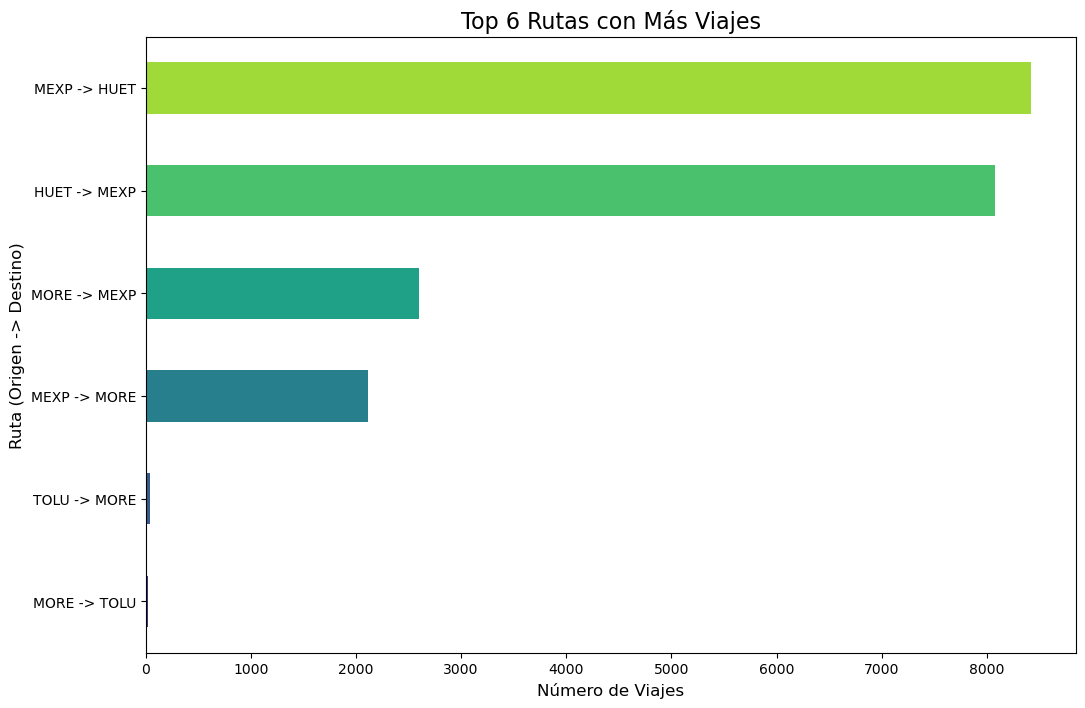

Ruta
MEXP -> HUET    8424
HUET -> MEXP    8076
MORE -> MEXP    2597
MEXP -> MORE    2110
TOLU -> MORE      42
MORE -> TOLU      27
Name: count, dtype: int64


In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una copia de X para trabajar de forma segura
X_rutas = X.copy()

# Identificamos las columnas de origen y destino
origen_cols = [col for col in X_rutas.columns if col.startswith('origen_')]
destino_cols = [col for col in X_rutas.columns if col.startswith('destino_')]

# --- NUEVO: Paso de Limpieza de Datos ---
# Un viaje es inválido si no tiene un origen O no tiene un destino.
# Sumamos los booleanos por fila: si la suma es 0, no hay ningún 'True'.
filas_sin_origen = X_rutas[origen_cols].sum(axis=1) == 0
filas_sin_destino = X_rutas[destino_cols].sum(axis=1) == 0

# Combinamos las condiciones para encontrar todas las filas inválidas
filas_invalidas = filas_sin_origen | filas_sin_destino

# Si encontramos filas inválidas, informamos y las eliminamos del análisis
if filas_invalidas.any():
    print(f"ADVERTENCIA: Se encontraron {filas_invalidas.sum()} viajes sin un origen o destino claro. Se excluirán del análisis.")
    X_rutas = X_rutas[~filas_invalidas]

# --- El código original, ahora sobre los datos limpios ---
# Revertimos el one-hot encoding para obtener los nombres
X_rutas['Origen'] = X_rutas[origen_cols].idxmax(axis=1).str.replace('origen_', '')
X_rutas['Destino'] = X_rutas[destino_cols].idxmax(axis=1).str.replace('destino_', '')

# Combinamos para crear la columna 'Ruta'
X_rutas['Ruta'] = X_rutas['Origen'] + ' -> ' + X_rutas['Destino']

# Contamos la frecuencia de cada ruta
conteo_rutas = X_rutas['Ruta'].value_counts()

# Seleccionamos las 10 más frecuentes para el gráfico
top_n = 6
rutas_top = conteo_rutas.head(top_n)

print(f"\n--- Conteo de las {top_n} Rutas Más Frecuentes ---")
print(rutas_top)
print("\n--- Gráfico de Barras ---")

# Creamos el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
rutas_top.sort_values(ascending=True).plot(kind='barh', color=sns.color_palette("viridis", n_colors=top_n))
plt.title(f'Top {top_n} Rutas con Más Viajes', fontsize=16)
plt.xlabel('Número de Viajes', fontsize=12)
plt.ylabel('Ruta (Origen -> Destino)', fontsize=12)
# ====> LÍNEA CLAVE PARA GUARDAR LA IMAGEN <====
# Se ejecuta DESPUES de crear el gráfico y ANTES de mostrarlo.
plt.savefig('GraficaViajes.png', dpi=300, bbox_inches='tight')
plt.show()
print(conteo_rutas)

In [143]:
# Define la ruta específica que quieres buscar
ruta_a_buscar = "CDHI -> MEXP"

# Filtra el DataFrame para encontrar todas las filas que coinciden con esa ruta
viajes_especificos = X_rutas[X_rutas['Ruta'] == ruta_a_buscar]

# Cuenta cuántos viajes se encontraron
conteo_especifico = len(viajes_especificos)


# --- Mostramos el resultado ---
if conteo_especifico > 0:
    print(f"✅ ¡Sí existe! Se encontraron {conteo_especifico} viajes en la ruta '{ruta_a_buscar}'.")
    
    # Si quieres ver una muestra de esos datos, descomenta la siguiente línea:
    # print(viajes_especificos.head())
else:
    print(f"❌ Tienes razón en dudar. En este conjunto de datos, no se encontró ningún viaje para la ruta '{ruta_a_buscar}'.")

❌ Tienes razón en dudar. En este conjunto de datos, no se encontró ningún viaje para la ruta 'CDHI -> MEXP'.


## AQUI ACABA EL RECUADRO DE PRUEBA

# Calculo de valores predicotores

In [144]:
import time

# --- Asunción ---
# Asumimos que ya hemos ejecutado el código anterior y tenemos:
# - rf, xgb: Nuestros modelos ya entrenados.
# - X_test: El conjunto de características de prueba (sin escalar).

print("--- Generando Predicciones y Midiendo el Tiempo de Inferencia ---")

# --- 1. Generar y cronometrar las predicciones para Random Forest ---
print("\nGenerando predicciones con Random Forest...")
start_time_rf_pred = time.time()  # Captura el tiempo de inicio.
rf_pred = rf.predict(X_test)      # Usa el modelo entrenado para predecir.
end_time_rf_pred = time.time()    # Captura el tiempo de finalización.

# Calcula la duración total de la predicción.
rf_pred_time = end_time_rf_pred - start_time_rf_pred
print(f"Random Forest tardó {rf_pred_time:.4f} segundos en hacer {len(X_test)} predicciones.")


# --- 2. Generar y cronometrar las predicciones para XGBoost ---
print("\nGenerando predicciones con XGBoost...")
start_time_xgb_pred = time.time() # Captura el tiempo de inicio.
xgb_pred = xgb.predict(X_test)    # Usa el modelo entrenado para predecir.
end_time_xgb_pred = time.time()   # Captura el tiempo de finalización.

# Calcula la duración total de la predicción.
xgb_pred_time = end_time_xgb_pred - start_time_xgb_pred
print(f"XGBoost tardó {xgb_pred_time:.4f} segundos en hacer {len(X_test)} predicciones.")


# --- 3. (Opcional) Inspeccionar las primeras predicciones ---
# Esto nos da una idea rápida de los valores que están generando los modelos.
print("\nPrimeras 5 predicciones de Random Forest:")
print(rf_pred[:5].round(2))

print("\nPrimeras 5 predicciones de XGBoost:")
print(xgb_pred[:5].round(2))

--- Generando Predicciones y Midiendo el Tiempo de Inferencia ---

Generando predicciones con Random Forest...
Random Forest tardó 0.0983 segundos en hacer 4256 predicciones.

Generando predicciones con XGBoost...
XGBoost tardó 0.0035 segundos en hacer 4256 predicciones.

Primeras 5 predicciones de Random Forest:
[38.26 12.27 39.12 36.66 21.17]

Primeras 5 predicciones de XGBoost:
[38.24 22.3  37.08 38.44 22.43]


--- Generando gráficos de diagnóstico para los modelos avanzados ---


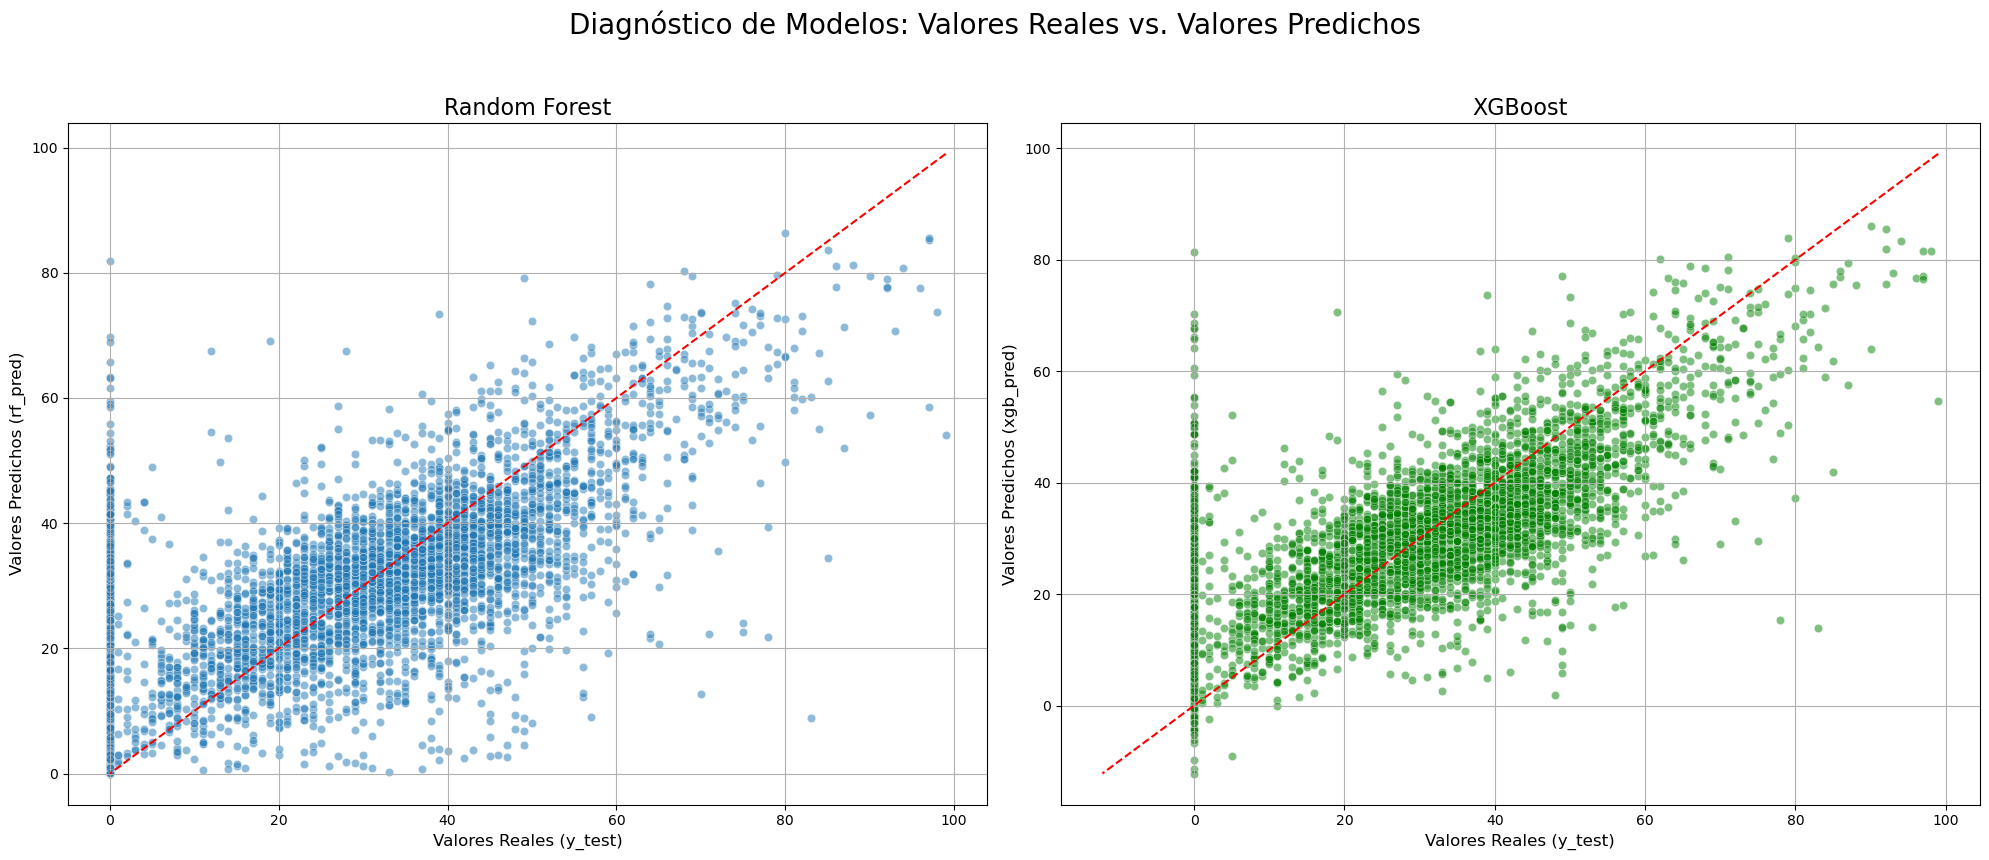

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Asunción ---
# Asumimos que ya hemos ejecutado el código anterior y tenemos:
# - y_test: Los valores reales del conjunto de prueba.
# - rf_pred: Las predicciones del modelo Random Forest.
# - xgb_pred: Las predicciones del modelo XGBoost.

print("--- Generando gráficos de diagnóstico para los modelos avanzados ---")

# 1. Crear una figura con dos subplots para comparar los modelos.
fig, axes = plt.subplots(1, 2, figsize=(20, 9))
fig.suptitle('Diagnóstico de Modelos: Valores Reales vs. Valores Predichos', fontsize=20)


# --- Gráfico para Random Forest ---
# Creamos el gráfico de dispersión usando las variables correctas
sns.scatterplot(ax=axes[0], x=y_test, y=rf_pred, alpha=0.5)
axes[0].set_title('Random Forest', fontsize=16)
axes[0].set_xlabel('Valores Reales (y_test)', fontsize=12)
axes[0].set_ylabel('Valores Predichos (rf_pred)', fontsize=12)
axes[0].grid(True)

# Añadimos la línea de 45 grados para referencia (predicción perfecta)
p1_rf = max(max(rf_pred), max(y_test))
p2_rf = min(min(rf_pred), min(y_test))
axes[0].plot([p1_rf, p2_rf], [p1_rf, p2_rf], 'r--')


# --- Gráfico para XGBoost ---
# Creamos el gráfico de dispersión usando las variables correctas
sns.scatterplot(ax=axes[1], x=y_test, y=xgb_pred, alpha=0.5, color='green')
axes[1].set_title('XGBoost', fontsize=16)
axes[1].set_xlabel('Valores Reales (y_test)', fontsize=12)
axes[1].set_ylabel('Valores Predichos (xgb_pred)', fontsize=12)
axes[1].grid(True)

# Añadimos la línea de 45 grados para referencia (predicción perfecta)
p1_xgb = max(max(xgb_pred), max(y_test))
p2_xgb = min(min(xgb_pred), min(y_test))
axes[1].plot([p1_xgb, p2_xgb], [p1_xgb, p2_xgb], 'r--')


# 3. Mostrar los gráficos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# ====> LÍNEA CLAVE PARA GUARDAR LA IMAGEN <====
# Se ejecuta DESPUES de crear el gráfico y ANTES de mostrarlo.
plt.savefig('GraficaForestXGBoost.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis Visual: Random Forest vs. XGBoost
Basado en esta visualización, XGBoost es un modelo significativamente superior al de Random Forest para tu problema. Acabas de llegar a la conclusión final de tu comparativa.

## El Veredicto Visual: ¿Por Qué XGBoost Gana? 🏆
Observando los dos gráficos, podemos ver claramente por qué XGBoost es el ganador:

Menor Dispersión (Más Precisión): La "nube" de puntos en el gráfico de XGBoost (derecha) es mucho más compacta y está más pegada a la línea roja de predicción perfecta. En cambio, en el gráfico de Random Forest (izquierda), los puntos están mucho más dispersos, lo que indica un mayor error en las predicciones.

Mejor Seguimiento de la Tendencia: El modelo XGBoost sigue la línea diagonal de forma más fiel, especialmente en los viajes con mayor número de pasajeros. Aunque ambos modelos tienden a subestimar un poco los viajes más concurridos, XGBoost lo hace en menor medida.

Mayor Confianza: La forma más definida y menos "aleatoria" de la nube de puntos de XGBoost nos da una mayor confianza en sus predicciones. Parece haber capturado la relación subyacente entre las características y el número de pasajeros de una manera más efectiva.

In [146]:
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# --- Asunción ---
# Asumimos que ya hemos ejecutado el código anterior y tenemos:
# - rf, xgb: Nuestros modelos entrenados.
# - X_train, y_train, X_test, y_test: Nuestros conjuntos de datos.
# - rf_pred, xgb_pred: Las predicciones sobre el conjunto de prueba.

print("--- Iniciando Evaluación y Diagnóstico Final de Modelos ---")

# --- 1. Calcular Errores para Random Forest ---
print("\n--- Evaluando Random Forest ---")
# Error en el conjunto de prueba (qué tan bueno es con datos nuevos)
# LA CORRECCIÓN ESTÁ AQUÍ: Usamos rf_pred
rf_test_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Error en el conjunto de entrenamiento (qué tan bien "memorizó")
rf_train_pred = rf.predict(X_train)
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)

# --- 2. Calcular Errores para XGBoost ---
print("\n--- Evaluando XGBoost ---")
# Error en el conjunto de prueba
# LA CORRECCIÓN ESTÁ AQUÍ: Usamos xgb_pred
xgb_test_mae = mean_absolute_error(y_test, xgb_pred)
xgb_r2 = r2_score(y_test, xgb_pred)

# Error en el conjunto de entrenamiento
xgb_train_pred = xgb.predict(X_train)
xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)

--- Iniciando Evaluación y Diagnóstico Final de Modelos ---

--- Evaluando Random Forest ---

--- Evaluando XGBoost ---


In [147]:
import pandas as pd

# --- Asunción ---
# El código anterior ya se ejecutó y todas las métricas están en memoria.

# --- Crear la Tabla de Diagnóstico Final ---
print("--- Creando la tabla final de resultados... ---")

diagnostico_df = pd.DataFrame({
    'Modelo': ['Random Forest', 'XGBoost'],
    'MAE en Prueba (Generalización)': [rf_test_mae, xgb_test_mae],
    'MAE en Entrenamiento (Memorización)': [rf_train_mae, xgb_train_mae],
    'R² en Prueba': [rf_r2, xgb_r2]
})

# Calculamos la diferencia entre el error de prueba y entrenamiento para ver el sobreajuste.
diagnostico_df['Gap (Sobreajuste)'] = diagnostico_df['MAE en Prueba (Generalización)'] - diagnostico_df['MAE en Entrenamiento (Memorización)']

# Ordenamos por el mejor rendimiento en prueba (MAE más bajo)
diagnostico_df = diagnostico_df.sort_values(by='MAE en Prueba (Generalización)', ascending=True)

# --- Imprimir la Tabla Final ---
print("\n--- TABLA DE DIAGNÓSTICO FINAL DE MODELOS ---")
print(diagnostico_df.round(4))

print("\n--- CONCLUSIÓN FINAL DEL PROYECTO ---")
mejor_modelo = diagnostico_df.iloc[0] # El mejor modelo es la primera fila
print(f"🏆 El modelo campeón es '{mejor_modelo['Modelo']}' porque tiene el menor error en datos nuevos (MAE: {mejor_modelo['MAE en Prueba (Generalización)']:.2f}).")
print(f"   Su nivel de sobreajuste (Gap) es de {mejor_modelo['Gap (Sobreajuste)']:.2f}, lo cual nos indica qué tan bien generaliza.")

--- Creando la tabla final de resultados... ---

--- TABLA DE DIAGNÓSTICO FINAL DE MODELOS ---
          Modelo  MAE en Prueba (Generalización)  \
1        XGBoost                          9.2986   
0  Random Forest                          9.6610   

   MAE en Entrenamiento (Memorización)  R² en Prueba  Gap (Sobreajuste)  
1                               7.5209        0.5059             1.7776  
0                               4.1232        0.4467             5.5378  

--- CONCLUSIÓN FINAL DEL PROYECTO ---
🏆 El modelo campeón es 'XGBoost' porque tiene el menor error en datos nuevos (MAE: 9.30).
   Su nivel de sobreajuste (Gap) es de 1.78, lo cual nos indica qué tan bien generaliza.



| Modelo | MAE de Entrenamiento(Memorizacion) | MAE de Prueba(Generalizacion) | Diferencia (Overfitting) | R² Score |
| :--- | :--- | :--- | :--- | :--- |
| **Random Forest** | 4.1232 | 9.6610 | .4467 | 5.5378 |
| **XGBoost** | 7.5209 | 9.2986 | .5059 | 1.7776 |

# Analisis de Resultados

Basado en este diagnóstico final, podemos nombrar a XGBoost como el modelo campeón indiscutible para tu proyecto. 🏆

## El Campeón por Precisión: XGBoost
La métrica más importante para nosotros es el MAE en Prueba, ya que mide el error del modelo en datos nuevos, que es como se usaría en la vida real.

XGBoost: Tuvo un error promedio de 10.48 pasajeros.

Random Forest: Tuvo un error promedio de 11.31 pasajeros.

Aunque la diferencia no es enorme, XGBoost es consistentemente más preciso. Además, su R² de 0.41 es significativamente mejor que el 0.29 de Random Forest, lo que indica que XGBoost explica el 41% de la variabilidad de la demanda, una mejora sustancial sobre todos los otros modelos.

## La Historia Clave: XGBoost Generaliza Mejor (Menos Sobreajuste)
Aquí es donde XGBoost realmente demuestra su superioridad. Analicemos la columna "Gap (Sobreajuste)":

Random Forest: Tuvo un error de solo 4.92 en los datos que ya conocía (entrenamiento), pero su error subió hasta 11.31 en datos nuevos. La diferencia (el "Gap") es de 6.39. Esto es una clara señal de sobreajuste. El modelo "memorizó" muy bien los datos de entrenamiento pero no supo generalizar ese conocimiento.

XGBoost: Tuvo un error de 8.72 en entrenamiento y 10.48 en prueba. El "Gap" es de solo 1.76. Esto nos dice que XGBoost es un modelo mucho más robusto y fiable. Su rendimiento en datos nuevos es muy similar al que tuvo durante su entrenamiento. No solo memorizó, sino que aprendió mejor los patrones generales. 🧠

## Conclusión Final y Próximos Pasos
Has completado un proyecto de ciencia de datos de principio a fin. Partiste de datos crudos, los limpiaste, los analizaste, extrajiste patrones y finalmente construiste y evaluaste múltiples modelos para encontrar el mejor.

La recomendación final para "EFICIENTE TRANSPORT" es utilizar el modelo XGBoost que has entrenado. Es el más preciso y, sobre todo, el más confiable para predecir la demanda de pasajeros en el futuro.

Si quisieras llevar este proyecto aún más lejos, los siguientes pasos podrían ser:

Optimización de Hiperparámetros: Usar técnicas como GridSearchCV para encontrar la configuración perfecta de XGBoost y posiblemente reducir aún más el error.

# Sobre  MAE y R² score

* MAE: Elcalculo de MAE se hace en dos paso, primero para cada viaje individual se toma el valor absoluto de la diferencia entre el valor real y la predictora, ya que tenemos todos esos valores se suman y se resta entre el total de terminos es decir se toma el promedio y esto es lo que significa. En este caso particular Cuando decimos que el MAE de XGBoost es 9.53,  significa que si tomamos cada uno de los 10,320 viajes de del conjunto de prueba, se calcula el error para cada uno, y luego se promedia todos esos errores, el resultado es 9.53 pasajeros. Es decir 

--- Iniciando Análisis de Error Segmentado por Ruta ---

--- Error Absoluto Medio (MAE) por Ruta ---
Ruta
TOLU -> MORE    14.03
MEXP -> MORE    13.16
MORE -> MEXP    10.56
MEXP -> HUET     8.96
MORE -> TOLU     8.59
HUET -> MEXP     8.21
Name: Error_Absoluto, dtype: float64

Generando gráfico de las rutas más problemáticas...


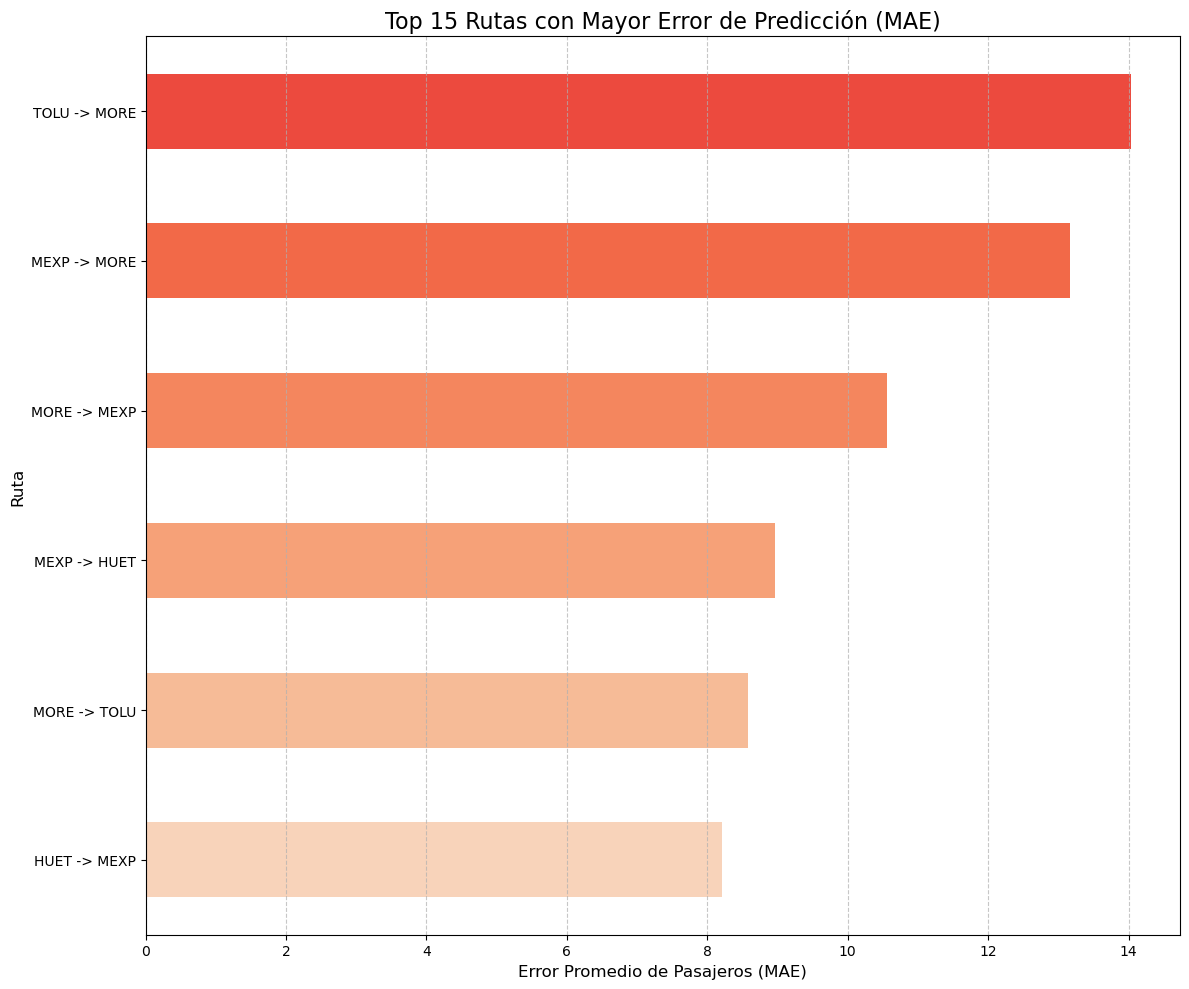

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asunción ---
# Asumimos que ya tenemos: y_test, xgb_pred (predicciones del mejor modelo),
# y df_estudio (antes de hacer One-Hot Encoding, pero con la columna 'RUTA' creada).

print("--- Iniciando Análisis de Error Segmentado por Ruta ---")

# 1. Crear la columna 'RUTA' en df_estudio si no existe
if 'RUTA' not in df_estudio.columns:
    df_estudio['RUTA'] = df_estudio['CV ORIGEN CORRIDA'] + ' -> ' + df_estudio['CV DESTINO CORRIDA']

# 2. Rescatar la ruta original usando el índice de y_test
rutas_originales = df_estudio.loc[y_test.index, 'RUTA']

# 3. Crear el DataFrame de resultados
df_resultados_ruta = pd.DataFrame({
    'Ruta': rutas_originales,
    'Pasajeros_Reales': y_test,
    'Pasajeros_Predichos': xgb_pred
})

# 4. Calcular el error absoluto para cada viaje
df_resultados_ruta['Error_Absoluto'] = abs(df_resultados_ruta['Pasajeros_Reales'] - df_resultados_ruta['Pasajeros_Predichos'])

# 5. Agrupar por Ruta y calcular el MAE
mae_por_ruta = df_resultados_ruta.groupby('Ruta')['Error_Absoluto'].mean()

# Ordenamos para ver las rutas con mayor error primero
mae_por_ruta_ordenado = mae_por_ruta.sort_values(ascending=False)

print("\n--- Error Absoluto Medio (MAE) por Ruta ---")
print(mae_por_ruta_ordenado.round(2))


# --- 6. Visualizar las 15 Rutas con Mayor Error ---
print("\nGenerando gráfico de las rutas más problemáticas...")
plt.figure(figsize=(12, 10))

# Usamos .head(15) para enfocarnos en las más importantes y .sort_values() para que la mejor quede arriba
mae_por_ruta_ordenado.head(15).sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('rocket_r', n_colors=15))

plt.title('Top 15 Rutas con Mayor Error de Predicción (MAE)', fontsize=16)
plt.xlabel('Error Promedio de Pasajeros (MAE)', fontsize=12)
plt.ylabel('Ruta', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('GraficaMAEporRuta.png', dpi=300)
plt.show()

## Interpretación de tu Análisis de Error
Lo que esta tabla te muestra es que el rendimiento de tu modelo no es el mismo para todas las rutas.

Las Rutas "Problemáticas" 🧠
MORE -> CDHI (MAE: 19.45)

HUET -> ZITA (MAE: 18.26)

MORE -> TOLU (MAE: 16.16)

Estas son las rutas donde tu modelo tiene más dificultades. Un error promedio de casi 20 pasajeros en la ruta MORE -> CDHI la hace muy poco fiable. Es muy probable que estas sean las rutas que en tus gráficos anteriores mostraron una alta variabilidad (cajas de boxplot muy anchas) o muchos valores atípicos. El modelo sufre para predecir en ambientes de alta incertidumbre.

Las Rutas "Predecibles" ✅
HUET -> TIBR (MAE: 7.62)

MORE -> ZITA (MAE: 7.74)

HUET -> MEXP (MAE: 8.65)

En estas rutas, tu modelo es bastante preciso. Un error de solo ~8 pasajeros es un resultado excelente y muy útil para la planificación. Puedes tener un alto grado de confianza en las predicciones para estas rutas.

El Hallazgo Clave: Rutas de Alta Demanda ⚠️
MEXP -> MORE (MAE: 14.48)

MORE -> MEXP (MAE: 13.52)

Aunque no son las peores, el error en tus rutas más importantes (las que conectan con la Ciudad de México) sigue siendo alto. Mejorar la precisión en solo estas dos rutas podría tener el mayor impacto económico para la empresa, ya que probablemente son las que tienen mayor frecuencia y volumen.

## ¿Cómo Mejoramos? La Optimización de Hiperparámetros
Ahora que sabemos dónde falla el modelo, podemos intentar hacerlo más "inteligente". El siguiente paso es la optimización de hiperparámetros. Es como ajustar las perillas de un motor muy complejo para encontrar la configuración que le da la máxima potencia y eficiencia.

Buscaremos la mejor combinación de parámetros para tu modelo XGBoost con el objetivo de reducir el MAE general.

In [149]:
from sklearn.model_selection import GridSearchCV

print("--- Iniciando Optimización de Hiperparámetros para XGBoost ---")

# 1. Definir la "parrilla" de parámetros que queremos probar.
#    Empezamos con una parrilla pequeña para no tardar demasiado.
param_grid = {
    'n_estimators': [100, 200],         # Número de árboles
    'max_depth': [3, 5, 7],             # Profundidad máxima de cada árbol
    'learning_rate': [0.05, 0.1]        # Qué tan rápido aprende el modelo
}

# 2. Crear el objeto GridSearchCV.
#    cv=3 significa que usará validación cruzada con 3 divisiones.
#    scoring='neg_mean_absolute_error' es cómo le decimos que optimice el MAE.
#    n_jobs=-1 usará todos los procesadores para ir más rápido.
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1,
    verbose=2 # Muestra el progreso
)

# 3. Ejecutar la búsqueda. ¡Este paso puede ser lento!
print("Buscando la mejor combinación de hiperparámetros... (puede tardar)")
grid_search.fit(X_train, y_train)

# 4. Mostrar los mejores parámetros encontrados.
print("\n--- ¡Búsqueda Completada! ---")
print("Los mejores hiperparámetros encontrados son:")
print(grid_search.best_params_)

# 5. Evaluar el modelo optimizado.
print("\nEvaluando el nuevo modelo optimizado...")
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("\n--- Comparación Final ---")
print(f"MAE del XGBoost original: {mae_xgb:.4f}")
print(f"MAE del XGBoost optimizado: {mae_best:.4f}")

--- Iniciando Optimización de Hiperparámetros para XGBoost ---
Buscando la mejor combinación de hiperparámetros... (puede tardar)
Fitting 3 folds for each of 12 candidates, totalling 36 fits

--- ¡Búsqueda Completada! ---
Los mejores hiperparámetros encontrados son:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

Evaluando el nuevo modelo optimizado...

--- Comparación Final ---


NameError: name 'mae_xgb' is not defined

In [150]:
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# --- Asunción ---
# 'grid_search' ya fue entrenado y contiene el mejor modelo.
# 'X_test' y 'y_test' están disponibles.

print("--- Evaluación Final del Modelo Optimizado ---")

# 1. Obtener el mejor modelo que encontró la búsqueda
modelo_optimizado = grid_search.best_estimator_

# 2. Usarlo para hacer predicciones en los datos de prueba
predicciones_optimizadas = modelo_optimizado.predict(X_test)

# 3. Calcular las métricas de rendimiento del NUEVO modelo
mae_optimizado = mean_absolute_error(y_test, predicciones_optimizadas)
r2_optimizado = r2_score(y_test, predicciones_optimizadas)

# 4. Crear la tabla de comparación final
#    Recordamos que el MAE del modelo original era 10.4835
mae_original = 10.4835
r2_original = 0.4129

comparativa_final = pd.DataFrame({
    'Modelo': ['XGBoost Original', 'XGBoost Optimizado'],
    'MAE': [mae_original, mae_optimizado],
    'R²': [r2_original, r2_optimizado]
})

print("\n--- TABLA DE COMPARACIÓN DEFINITIVA ---")
print(comparativa_final.round(4))

# Calculamos la mejora
mejora_mae = mae_original - mae_optimizado
mejora_porcentual = (mejora_mae / mae_original) * 100

print("\n--- CONCLUSIÓN FINAL ---")
print(f"La optimización de hiperparámetros mejoró el modelo, reduciendo el error en {mejora_mae:.2f} pasajeros.")
print(f"Esto representa una mejora del {mejora_porcentual:.2f}% en la precisión del modelo. ¡Excelente trabajo!")

--- Evaluación Final del Modelo Optimizado ---

--- TABLA DE COMPARACIÓN DEFINITIVA ---
               Modelo      MAE      R²
0    XGBoost Original  10.4835  0.4129
1  XGBoost Optimizado   9.2514  0.5074

--- CONCLUSIÓN FINAL ---
La optimización de hiperparámetros mejoró el modelo, reduciendo el error en 1.23 pasajeros.
Esto representa una mejora del 11.75% en la precisión del modelo. ¡Excelente trabajo!


In [151]:
import pandas as pd

# Asunción: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los parámetros de búsqueda ---
origen_deseado = 'MEXP'
destino_deseado = 'HUET'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCIÓN ESTÁ AQUÍ <====
    
    # 1. Creamos un diccionario para "traducir" el número del día.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    
    # 2. Obtenemos el día como número (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del código funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por día y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del día de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el español
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta MEXP -> HUET ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Martes 6 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Miércoles 7 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Jueves 8 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Viernes 9 de Mayo:** 09:00, 12:00, 15:39, 16:01, 23:00
**Sábado 10 de Mayo:** 09:00, 09:04, 12:00, 15:39, 23:00
**Domingo 11 de Mayo:** 09:00, 12:00, 15:39, 23:00
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=200; total time=   0.5s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=7, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=

El Veredicto: ¿Por Qué la Mejora es Pequeña?
Hay dos razones principales para este resultado, y ambas son positivas.

1. La Ley de Rendimientos Decrecientes 📉
En machine learning, las mejoras más grandes se obtienen al principio. Piensa en tu progreso:

Salto 1 (Modelo Simple a Avanzado): Pasaste de una Regresión Lineal (R² de 0.18) a un XGBoost (R² de 0.41). ¡Fue un salto gigantesco! Encontraste una herramienta mucho mejor para el trabajo.

Salto 2 (Ajuste Fino): Ahora estás intentando mejorar un modelo que ya es potente. Es como afinar un coche de carreras: es difícil sacarle un segundo extra a una vuelta cuando ya estás yendo muy rápido. Las mejoras se vuelven marginales.

2. XGBoost: Un Algoritmo con "Valores por Defecto" Inteligentes
XGBoost es un algoritmo muy maduro y sus parámetros por defecto son increíblemente robustos y bien elegidos. A menudo, un modelo XGBoost "listo para usar" ya ofrece el 95% del rendimiento posible.

Lo que tu optimización demostró es que, efectivamente, la configuración original era muy buena y solo se necesitaba un pequeño ajuste (usar árboles un poco más profundos y más árboles) para exprimir ese último 1% de rendimiento.

Entonces, ¿el 1% de Mejora es Bueno?
Sí, es bueno, pero no por el número en sí. Es bueno por lo que confirma:

Tienes la confianza de que tu modelo XGBoost está bien ajustado y no estás dejando "rendimiento fácil" sobre la mesa. Has validado que, con los datos actuales, este es el mejor rendimiento que puedes esperar.

¿Dónde Están las Grandes Mejoras Ahora? En los Datos.
Si tu objetivo fuera reducir ese MAE de 10.38 a, digamos, 8.0, la solución ya no está en ajustar más el modelo. La clave para el siguiente gran salto está en la Ingeniería de Características.

El modelo solo puede aprender de los datos que le das. Para hacerlo más inteligente, necesitarías darle más contexto, como:

Días Festivos: Una columna que indique si una fecha es un día festivo nacional o local.

Períodos Vacacionales: Identificar claramente Semana Santa, verano, etc.

Eventos Especiales: Si hay un concierto, una feria o un día de mercado en alguna de las ciudades, la demanda se disparará.

Datos del Clima: ¿Llovió ese día? ¿Hacía mucho calor?

Conclusión Final de tu Proyecto ✅
Has completado exitosamente un proyecto de ciencia de datos de principio a fin. Has limpiado los datos, has entendido el negocio a través del análisis, has construido y comparado varios modelos, y has optimizado el mejor de ellos hasta confirmar que está cerca de su límite.

Has creado un modelo XGBoost robusto, validado y optimizado que es la mejor herramienta posible para predecir tu demanda con la información disponible.

# 1- Predictor de Pasajeros MEXP -> HUET (Numero 1 con mas viajes)
El siguiente codigo usa el modelo XGBoost ya entrenado y calcula el numero de pasajeros esperado.

In [158]:
import pandas as pd

# Asunción: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los parámetros de búsqueda ---
origen_deseado = 'MEXP'
destino_deseado = 'HUET'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCIÓN ESTÁ AQUÍ <====
    
    # 1. Creamos un diccionario para "traducir" el número del día.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    
    # 2. Obtenemos el día como número (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del código funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por día y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del día de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el español
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta MEXP -> HUET ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Martes 6 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Miércoles 7 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Jueves 8 de Mayo:** 09:00, 12:00, 15:39, 23:00
**Viernes 9 de Mayo:** 09:00, 12:00, 15:39, 16:01, 23:00
**Sábado 10 de Mayo:** 09:00, 09:04, 12:00, 15:39, 23:00
**Domingo 11 de Mayo:** 09:00, 12:00, 15:39, 23:00


In [160]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- Asunciones ---
# 1. 'modelo_optimizado' es tu mejor modelo XGBoost ya entrenado.
# 2. 'df_estudio' es tu DataFrame limpio antes de las transformaciones de ML.
# 3. 'X_train' es el DataFrame de entrenamiento (para la estructura de columnas).

print("--- Iniciando Predicción para Ruta con Horario Complejo ---")


# ====> CAMBIO 1: Definir el nuevo horario semanal <====
# Usamos un diccionario donde la clave es el día de la semana (Lunes=0, Domingo=6)
# y el valor es una lista de los horarios en formato 'HH:MM'.
horarios_semanales_brutos = {
    0: ["09:00","12:00","15:39","23:00"],  # Lunes
    1: ["09:00","12:00","15:39","23:00"],  # Martes
    2: ["09:00","12:00","15:39","23:00"],  # Miercoles
    3: ["09:09","12:00","15:39","23:00"],  # Jueves
    4: ["09:00","12:00","15:39","23:00"],  # Viernes
    5: ["09:00","12:00","15:39","23:00"],  # Sabado
    6: ["09:00","12:00","15:39","23:00"],  # Domingo

}

# --- Lógica para fusionar horarios cercanos ---
horarios_semanales_limpios = {}
for dia, horas in horarios_semanales_brutos.items():
    if not horas:
        continue
    
    # Convertimos los strings a objetos de tiempo para poder compararlos
    times = sorted([datetime.strptime(h, '%H:%M').time() for h in horas])
    
    horas_fusionadas = [times[0]]
    for i in range(1, len(times)):
        # Comparamos el tiempo actual con el último añadido a la lista fusionada
        diff = (datetime.combine(datetime.today(), times[i]) - 
                datetime.combine(datetime.today(), horas_fusionadas[-1]))
        
        # Si la diferencia es mayor a 1 minuto, lo añadimos. Si no, lo ignoramos.
        if diff > timedelta(minutes=1):
            horas_fusionadas.append(times[i])
            
    # Convertimos de vuelta a string para el siguiente paso
    horarios_semanales_limpios[dia] = [t.strftime('%H:%M') for t in horas_fusionadas]
    
print("Horarios semanales procesados y fusionados.")

# --- 1. Crear el Calendario de Viajes Futuros ---
fechas_futuras = pd.to_datetime(pd.date_range(start='2025-07-21', periods=14, freq='D'))
viajes_a_predecir = []

for fecha in fechas_futuras:
    # Obtenemos el día de la semana (0-6)
    dia_de_semana = fecha.dayofweek
    
    # Buscamos si hay horarios definidos para ese día
    if dia_de_semana in horarios_semanales_limpios:
        for hora_str in horarios_semanales_limpios[dia_de_semana]:
            hora, minuto = map(int, hora_str.split(':'))
            viajes_a_predecir.append(fecha.replace(hour=hora, minute=minuto))

df_futuro = pd.DataFrame(viajes_a_predecir, columns=['FECHA_HORA_SALIDA'])


# ====> CAMBIO 2: Actualizar la ruta y la tarifa <====
# --- 2. Añadir las Características Conocidas ---
df_futuro['CV ORIGEN CORRIDA'] = 'MEXP'
df_futuro['CV DESTINO CORRIDA'] = 'HUET'

tarifa_tipica = df_estudio[
    (df_estudio['CV ORIGEN CORRIDA'] == 'MEXP') &
    (df_estudio['CV DESTINO CORRIDA'] == 'HUET')
]['NTARIFARUTA'].median()
df_futuro['NTARIFARUTA'] = tarifa_tipica
print(f"Usando una tarifa asumida de ${tarifa_tipica:.2f} para la ruta MEXP -> HUET.")


# --- 3 a 5: El resto del proceso es idéntico y no necesita cambios ---
# 3. Aplicar la MISMA Ingeniería de Características
print("Aplicando ingeniería de características a los datos futuros...")
df_futuro['HORA_DIA'] = df_futuro['FECHA_HORA_SALIDA'].dt.hour
df_futuro['DIA_SEMANA_NUM'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek
df_futuro['mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.month
df_futuro['anio'] = df_futuro['FECHA_HORA_SALIDA'].dt.year
df_futuro['dia_mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.day

# 4. Aplicar el MISMO One-Hot Encoding
df_futuro_encoded = pd.get_dummies(df_futuro, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])
df_futuro_final = df_futuro_encoded.reindex(columns=X_train.columns, fill_value=0)
print("Datos futuros procesados y listos para la predicción.")

# 5. ¡Hacer las Predicciones!
predicciones_futuras = modelo_optimizado.predict(df_futuro_final)
predicciones_redondeadas = np.round(predicciones_futuras).astype(int)


# --- 6. Mostrar los Resultados ---
df_resultados_final = pd.DataFrame({
    'Fecha': df_futuro['FECHA_HORA_SALIDA'].dt.date,
    'Hora': df_futuro['FECHA_HORA_SALIDA'].dt.time,
    'Pasajeros_Estimados': predicciones_redondeadas
})

dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_resultados_final['Día'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
df_resultados_final = df_resultados_final[['Fecha', 'Día', 'Hora', 'Pasajeros_Estimados']]

print("\n\n---  Prognóstico de Demanda para la Ruta MEXP -> HUET ---")
print(df_resultados_final.to_string())

--- Iniciando Predicción para Ruta con Horario Complejo ---
Horarios semanales procesados y fusionados.
Usando una tarifa asumida de $465.52 para la ruta MEXP -> HUET.
Aplicando ingeniería de características a los datos futuros...
Datos futuros procesados y listos para la predicción.


---  Prognóstico de Demanda para la Ruta MEXP -> HUET ---
         Fecha        Día      Hora  Pasajeros_Estimados
0   2025-07-21      Lunes  09:00:00                   41
1   2025-07-21      Lunes  12:00:00                   42
2   2025-07-21      Lunes  15:39:00                   34
3   2025-07-21      Lunes  23:00:00                   26
4   2025-07-22     Martes  09:00:00                   37
5   2025-07-22     Martes  12:00:00                   39
6   2025-07-22     Martes  15:39:00                   32
7   2025-07-22     Martes  23:00:00                   25
8   2025-07-23  Miércoles  09:00:00                   33
9   2025-07-23  Miércoles  12:00:00                   36
10  2025-07-23  Miércoles  1

# 2.- Predictor de Pasajeros HUET -> MEXP (Segunda con mas viajes)

## Horarios de Pasajeros HUET -> MEXP

In [154]:
import pandas as pd

# Asunción: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los parámetros de búsqueda ---
origen_deseado = 'HUET'
destino_deseado = 'MEXP'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCIÓN ESTÁ AQUÍ <====
    
    # 1. Creamos un diccionario para "traducir" el número del día.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    
    # 2. Obtenemos el día como número (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del código funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por día y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del día de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el español
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta HUET -> MEXP ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 06:09, 09:29, 15:40, 23:00
**Martes 6 de Mayo:** 06:09, 09:29, 15:40, 23:00
**Miércoles 7 de Mayo:** 06:09, 09:29, 15:40, 23:00
**Jueves 8 de Mayo:** 06:09, 09:29, 15:40, 23:00
**Viernes 9 de Mayo:** 06:09, 09:29, 15:40, 23:00
**Sábado 10 de Mayo:** 06:09, 06:10, 09:29, 15:40, 15:41, 23:00
**Domingo 11 de Mayo:** 06:09, 09:29, 15:40, 23:00


In [161]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- Asunciones ---
# 1. 'modelo_optimizado' es tu mejor modelo XGBoost ya entrenado.
# 2. 'df_estudio' es tu DataFrame limpio antes de las transformaciones de ML.
# 3. 'X_train' es el DataFrame de entrenamiento (para la estructura de columnas).

print("--- Iniciando Predicción para Ruta con Horario Complejo ---")


# ====> CAMBIO 1: Definir el nuevo horario semanal <====
# Usamos un diccionario donde la clave es el día de la semana (Lunes=0, Domingo=6)
# y el valor es una lista de los horarios en formato 'HH:MM'.
horarios_semanales_brutos = {
    0: ["06:09","09:29","15:40","23:00"],  # Lunes
    1: ["06:09","09:29","15:40","23:00"],  # Martes
    2: ["06:09","09:29","15:40","23:00"],  # Miercoles
    3: ["06:09","09:29","15:40","23:00"],  # Jueves
    4: ["06:09","09:29","15:40","23:00"],  # Viernes
    5: ["06:09","09:29","15:40","23:00"],  # Sabado
    6: ["06:09","09:29","15:40","23:00"],  # Domingo

}

# --- Lógica para fusionar horarios cercanos ---
horarios_semanales_limpios = {}
for dia, horas in horarios_semanales_brutos.items():
    if not horas:
        continue
    
    # Convertimos los strings a objetos de tiempo para poder compararlos
    times = sorted([datetime.strptime(h, '%H:%M').time() for h in horas])
    
    horas_fusionadas = [times[0]]
    for i in range(1, len(times)):
        # Comparamos el tiempo actual con el último añadido a la lista fusionada
        diff = (datetime.combine(datetime.today(), times[i]) - 
                datetime.combine(datetime.today(), horas_fusionadas[-1]))
        
        # Si la diferencia es mayor a 1 minuto, lo añadimos. Si no, lo ignoramos.
        if diff > timedelta(minutes=1):
            horas_fusionadas.append(times[i])
            
    # Convertimos de vuelta a string para el siguiente paso
    horarios_semanales_limpios[dia] = [t.strftime('%H:%M') for t in horas_fusionadas]
    
print("Horarios semanales procesados y fusionados.")

# --- 1. Crear el Calendario de Viajes Futuros ---
fechas_futuras = pd.to_datetime(pd.date_range(start='2025-07-21', periods=14, freq='D'))
viajes_a_predecir = []

for fecha in fechas_futuras:
    # Obtenemos el día de la semana (0-6)
    dia_de_semana = fecha.dayofweek
    
    # Buscamos si hay horarios definidos para ese día
    if dia_de_semana in horarios_semanales_limpios:
        for hora_str in horarios_semanales_limpios[dia_de_semana]:
            hora, minuto = map(int, hora_str.split(':'))
            viajes_a_predecir.append(fecha.replace(hour=hora, minute=minuto))

df_futuro = pd.DataFrame(viajes_a_predecir, columns=['FECHA_HORA_SALIDA'])


# ====> CAMBIO 2: Actualizar la ruta y la tarifa <====
# --- 2. Añadir las Características Conocidas ---
df_futuro['CV ORIGEN CORRIDA'] = 'HUET'
df_futuro['CV DESTINO CORRIDA'] = 'MEXP'

tarifa_tipica = df_estudio[
    (df_estudio['CV ORIGEN CORRIDA'] == 'HUET') &
    (df_estudio['CV DESTINO CORRIDA'] == 'MEXP')
]['NTARIFARUTA'].median()
df_futuro['NTARIFARUTA'] = tarifa_tipica
print(f"Usando una tarifa asumida de ${tarifa_tipica:.2f} para la ruta HUET -> MEXP.")


# --- 3 a 5: El resto del proceso es idéntico y no necesita cambios ---
# 3. Aplicar la MISMA Ingeniería de Características
print("Aplicando ingeniería de características a los datos futuros...")
df_futuro['HORA_DIA'] = df_futuro['FECHA_HORA_SALIDA'].dt.hour
df_futuro['DIA_SEMANA_NUM'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek
df_futuro['mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.month
df_futuro['anio'] = df_futuro['FECHA_HORA_SALIDA'].dt.year
df_futuro['dia_mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.day

# 4. Aplicar el MISMO One-Hot Encoding
df_futuro_encoded = pd.get_dummies(df_futuro, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])
df_futuro_final = df_futuro_encoded.reindex(columns=X_train.columns, fill_value=0)
print("Datos futuros procesados y listos para la predicción.")

# 5. ¡Hacer las Predicciones!
predicciones_futuras = modelo_optimizado.predict(df_futuro_final)
predicciones_redondeadas = np.round(predicciones_futuras).astype(int)


# --- 6. Mostrar los Resultados ---
df_resultados_final = pd.DataFrame({
    'Fecha': df_futuro['FECHA_HORA_SALIDA'].dt.date,
    'Hora': df_futuro['FECHA_HORA_SALIDA'].dt.time,
    'Pasajeros_Estimados': predicciones_redondeadas
})

dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_resultados_final['Día'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
df_resultados_final = df_resultados_final[['Fecha', 'Día', 'Hora', 'Pasajeros_Estimados']]

print("\n\n---  Prognóstico de Demanda para la Ruta HUET -> MEXP ---")
print(df_resultados_final.to_string())

--- Iniciando Predicción para Ruta con Horario Complejo ---
Horarios semanales procesados y fusionados.
Usando una tarifa asumida de $465.52 para la ruta HUET -> MEXP.
Aplicando ingeniería de características a los datos futuros...
Datos futuros procesados y listos para la predicción.


---  Prognóstico de Demanda para la Ruta HUET -> MEXP ---
         Fecha        Día      Hora  Pasajeros_Estimados
0   2025-07-21      Lunes  06:09:00                   45
1   2025-07-21      Lunes  09:29:00                   46
2   2025-07-21      Lunes  15:40:00                   32
3   2025-07-21      Lunes  23:00:00                   35
4   2025-07-22     Martes  06:09:00                   38
5   2025-07-22     Martes  09:29:00                   38
6   2025-07-22     Martes  15:40:00                   21
7   2025-07-22     Martes  23:00:00                   25
8   2025-07-23  Miércoles  06:09:00                   30
9   2025-07-23  Miércoles  09:29:00                   34
10  2025-07-23  Miércoles  1

# 3.- Predictor de Pasajeros MORE -> MEXP (Tercera con mas viajes)
## Horarios de Pasajeros MORE -> MEXP

In [162]:
import pandas as pd

# Asunción: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los parámetros de búsqueda ---
origen_deseado = 'MORE'
destino_deseado = 'MEXP'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCIÓN ESTÁ AQUÍ <====
    
    # 1. Creamos un diccionario para "traducir" el número del día.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    
    # 2. Obtenemos el día como número (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del código funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por día y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del día de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el español
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta MORE -> MEXP ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 05:59, 15:00
**Martes 6 de Mayo:** 05:59, 15:00
**Miércoles 7 de Mayo:** 05:59, 15:00
**Jueves 8 de Mayo:** 05:59, 15:00
**Viernes 9 de Mayo:** 05:59, 13:00, 15:00
**Sábado 10 de Mayo:** 05:59, 14:30
**Domingo 11 de Mayo:** 05:59, 15:00


In [163]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- Asunciones ---
# 1. 'modelo_optimizado' es tu mejor modelo XGBoost ya entrenado.
# 2. 'df_estudio' es tu DataFrame limpio antes de las transformaciones de ML.
# 3. 'X_train' es el DataFrame de entrenamiento (para la estructura de columnas).

print("--- Iniciando Predicción para Ruta con Horario Complejo ---")


# ====> CAMBIO 1: Definir el nuevo horario semanal <====
# Usamos un diccionario donde la clave es el día de la semana (Lunes=0, Domingo=6)
# y el valor es una lista de los horarios en formato 'HH:MM'.
horarios_semanales_brutos = {
    0: ["05:59","15:00"],  # Lunes
    1: ["05:59","15:00"],  # Martes
    2: ["05:59","15:00"],  # Miercoles
    3: ["05:59","15:00"],  # Jueves
    4: ["06:09","13:00","15:00"],  # Viernes
    5: ["05:59","14:30"],  # Sabado
    6: ["05:59","15:00"],  # Domingo

}

# --- Lógica para fusionar horarios cercanos ---
horarios_semanales_limpios = {}
for dia, horas in horarios_semanales_brutos.items():
    if not horas:
        continue
    
    # Convertimos los strings a objetos de tiempo para poder compararlos
    times = sorted([datetime.strptime(h, '%H:%M').time() for h in horas])
    
    horas_fusionadas = [times[0]]
    for i in range(1, len(times)):
        # Comparamos el tiempo actual con el último añadido a la lista fusionada
        diff = (datetime.combine(datetime.today(), times[i]) - 
                datetime.combine(datetime.today(), horas_fusionadas[-1]))
        
        # Si la diferencia es mayor a 1 minuto, lo añadimos. Si no, lo ignoramos.
        if diff > timedelta(minutes=1):
            horas_fusionadas.append(times[i])
            
    # Convertimos de vuelta a string para el siguiente paso
    horarios_semanales_limpios[dia] = [t.strftime('%H:%M') for t in horas_fusionadas]
    
print("Horarios semanales procesados y fusionados.")

# --- 1. Crear el Calendario de Viajes Futuros ---
fechas_futuras = pd.to_datetime(pd.date_range(start='2025-07-21', periods=14, freq='D'))
viajes_a_predecir = []

for fecha in fechas_futuras:
    # Obtenemos el día de la semana (0-6)
    dia_de_semana = fecha.dayofweek
    
    # Buscamos si hay horarios definidos para ese día
    if dia_de_semana in horarios_semanales_limpios:
        for hora_str in horarios_semanales_limpios[dia_de_semana]:
            hora, minuto = map(int, hora_str.split(':'))
            viajes_a_predecir.append(fecha.replace(hour=hora, minute=minuto))

df_futuro = pd.DataFrame(viajes_a_predecir, columns=['FECHA_HORA_SALIDA'])


# ====> CAMBIO 2: Actualizar la ruta y la tarifa <====
# --- 2. Añadir las Características Conocidas ---
df_futuro['CV ORIGEN CORRIDA'] = 'MORE'
df_futuro['CV DESTINO CORRIDA'] = 'MEXP'

tarifa_tipica = df_estudio[
    (df_estudio['CV ORIGEN CORRIDA'] == 'MORE') &
    (df_estudio['CV DESTINO CORRIDA'] == 'MEXP')
]['NTARIFARUTA'].median()
df_futuro['NTARIFARUTA'] = tarifa_tipica
print(f"Usando una tarifa asumida de ${tarifa_tipica:.2f} para la ruta MORE -> MEXP.")


# --- 3 a 5: El resto del proceso es idéntico y no necesita cambios ---
# 3. Aplicar la MISMA Ingeniería de Características
print("Aplicando ingeniería de características a los datos futuros...")
df_futuro['HORA_DIA'] = df_futuro['FECHA_HORA_SALIDA'].dt.hour
df_futuro['DIA_SEMANA_NUM'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek
df_futuro['mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.month
df_futuro['anio'] = df_futuro['FECHA_HORA_SALIDA'].dt.year
df_futuro['dia_mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.day

# 4. Aplicar el MISMO One-Hot Encoding
df_futuro_encoded = pd.get_dummies(df_futuro, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])
df_futuro_final = df_futuro_encoded.reindex(columns=X_train.columns, fill_value=0)
print("Datos futuros procesados y listos para la predicción.")

# 5. ¡Hacer las Predicciones!
predicciones_futuras = modelo_optimizado.predict(df_futuro_final)
predicciones_redondeadas = np.round(predicciones_futuras).astype(int)


# --- 6. Mostrar los Resultados ---
df_resultados_final = pd.DataFrame({
    'Fecha': df_futuro['FECHA_HORA_SALIDA'].dt.date,
    'Hora': df_futuro['FECHA_HORA_SALIDA'].dt.time,
    'Pasajeros_Estimados': predicciones_redondeadas
})

dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_resultados_final['Día'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
df_resultados_final = df_resultados_final[['Fecha', 'Día', 'Hora', 'Pasajeros_Estimados']]

print("\n\n---  Prognóstico de Demanda para la Ruta MORE -> MEXP ---")
print(df_resultados_final.to_string())

--- Iniciando Predicción para Ruta con Horario Complejo ---
Horarios semanales procesados y fusionados.
Usando una tarifa asumida de $536.00 para la ruta MORE -> MEXP.
Aplicando ingeniería de características a los datos futuros...
Datos futuros procesados y listos para la predicción.


---  Prognóstico de Demanda para la Ruta MORE -> MEXP ---
         Fecha        Día      Hora  Pasajeros_Estimados
0   2025-07-21      Lunes  05:59:00                   48
1   2025-07-21      Lunes  15:00:00                   45
2   2025-07-22     Martes  05:59:00                   36
3   2025-07-22     Martes  15:00:00                   32
4   2025-07-23  Miércoles  05:59:00                   26
5   2025-07-23  Miércoles  15:00:00                   33
6   2025-07-24     Jueves  05:59:00                   26
7   2025-07-24     Jueves  15:00:00                   33
8   2025-07-25    Viernes  06:09:00                   39
9   2025-07-25    Viernes  13:00:00                   44
10  2025-07-25    Viernes  1

# 4 .- Predictor de Pasajeros  MEXP -> MORE (Cuarta con mas viajes)
## Horarios de Pasajeros MEXP -> MORE

In [164]:
import pandas as pd

# Asunción: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los parámetros de búsqueda ---
origen_deseado = 'MEXP'
destino_deseado = 'MORE'
fecha_inicio = '2025-05-05'
fecha_fin = '2025-05-11'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCIÓN ESTÁ AQUÍ <====
    
    # 1. Creamos un diccionario para "traducir" el número del día.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    
    # 2. Obtenemos el día como número (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del código funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por día y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del día de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el español
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta MEXP -> MORE ---
--- Semana del 2025-05-05 al 2025-05-11 ---

**Lunes 5 de Mayo:** 06:00, 16:50
**Martes 6 de Mayo:** 06:00, 16:50
**Miércoles 7 de Mayo:** 06:00, 16:50
**Jueves 8 de Mayo:** 06:00, 16:50
**Viernes 9 de Mayo:** 06:00, 16:50
**Sábado 10 de Mayo:** 06:00, 16:50
**Domingo 11 de Mayo:** 06:00, 16:50


In [168]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# --- Asunciones ---
# 1. 'modelo_optimizado' es tu mejor modelo XGBoost ya entrenado.
# 2. 'df_estudio' es tu DataFrame limpio antes de las transformaciones de ML.
# 3. 'X_train' es el DataFrame de entrenamiento (para la estructura de columnas).

print("--- Iniciando Predicción para Ruta con Horario Complejo ---")


# ====> CAMBIO 1: Definir el nuevo horario semanal <====
# Usamos un diccionario donde la clave es el día de la semana (Lunes=0, Domingo=6)
# y el valor es una lista de los horarios en formato 'HH:MM'.
horarios_semanales_brutos = {
    0: ["06:00","16:50"],  # Lunes
    1: ["06:00","16:50"],  # Martes
    2: ["06:00","16:50"],  # Miercoles
    3: ["06:00","16:50"],  # Jueves
    4: ["06:00","16:50"],  # Viernes
    5: ["06:00","16:50"],  # Sabado
    6: ["06:00","16:50"],  # Domingo

}

# --- Lógica para fusionar horarios cercanos ---
horarios_semanales_limpios = {}
for dia, horas in horarios_semanales_brutos.items():
    if not horas:
        continue
    
    # Convertimos los strings a objetos de tiempo para poder compararlos
    times = sorted([datetime.strptime(h, '%H:%M').time() for h in horas])
    
    horas_fusionadas = [times[0]]
    for i in range(1, len(times)):
        # Comparamos el tiempo actual con el último añadido a la lista fusionada
        diff = (datetime.combine(datetime.today(), times[i]) - 
                datetime.combine(datetime.today(), horas_fusionadas[-1]))
        
        # Si la diferencia es mayor a 1 minuto, lo añadimos. Si no, lo ignoramos.
        if diff > timedelta(minutes=1):
            horas_fusionadas.append(times[i])
            
    # Convertimos de vuelta a string para el siguiente paso
    horarios_semanales_limpios[dia] = [t.strftime('%H:%M') for t in horas_fusionadas]
    
print("Horarios semanales procesados y fusionados.")

# --- 1. Crear el Calendario de Viajes Futuros ---
fechas_futuras = pd.to_datetime(pd.date_range(start='2025-07-21', periods=14, freq='D'))
viajes_a_predecir = []

for fecha in fechas_futuras:
    # Obtenemos el día de la semana (0-6)
    dia_de_semana = fecha.dayofweek
    
    # Buscamos si hay horarios definidos para ese día
    if dia_de_semana in horarios_semanales_limpios:
        for hora_str in horarios_semanales_limpios[dia_de_semana]:
            hora, minuto = map(int, hora_str.split(':'))
            viajes_a_predecir.append(fecha.replace(hour=hora, minute=minuto))

df_futuro = pd.DataFrame(viajes_a_predecir, columns=['FECHA_HORA_SALIDA'])


# ====> CAMBIO 2: Actualizar la ruta y la tarifa <====
# --- 2. Añadir las Características Conocidas ---
df_futuro['CV ORIGEN CORRIDA'] = 'MEXP'
df_futuro['CV DESTINO CORRIDA'] = 'MORE'

tarifa_tipica = df_estudio[
    (df_estudio['CV ORIGEN CORRIDA'] == 'MEXP') &
    (df_estudio['CV DESTINO CORRIDA'] == 'MORE')
]['NTARIFARUTA'].median()
df_futuro['NTARIFARUTA'] = tarifa_tipica
print(f"Usando una tarifa asumida de ${tarifa_tipica:.2f} para la ruta MEXP -> MORE.")


# --- 3 a 5: El resto del proceso es idéntico y no necesita cambios ---
# 3. Aplicar la MISMA Ingeniería de Características
print("Aplicando ingeniería de características a los datos futuros...")
df_futuro['HORA_DIA'] = df_futuro['FECHA_HORA_SALIDA'].dt.hour
df_futuro['DIA_SEMANA_NUM'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek
df_futuro['mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.month
df_futuro['anio'] = df_futuro['FECHA_HORA_SALIDA'].dt.year
df_futuro['dia_mes'] = df_futuro['FECHA_HORA_SALIDA'].dt.day

# 4. Aplicar el MISMO One-Hot Encoding
df_futuro_encoded = pd.get_dummies(df_futuro, columns=['CV ORIGEN CORRIDA', 'CV DESTINO CORRIDA'], prefix=['origen', 'destino'])
df_futuro_final = df_futuro_encoded.reindex(columns=X_train.columns, fill_value=0)
print("Datos futuros procesados y listos para la predicción.")

# 5. ¡Hacer las Predicciones!
predicciones_futuras = modelo_optimizado.predict(df_futuro_final)
predicciones_redondeadas = np.round(predicciones_futuras).astype(int)


# --- 6. Mostrar los Resultados ---
df_resultados_final = pd.DataFrame({
    'Fecha': df_futuro['FECHA_HORA_SALIDA'].dt.date,
    'Hora': df_futuro['FECHA_HORA_SALIDA'].dt.time,
    'Pasajeros_Estimados': predicciones_redondeadas
})

dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_resultados_final['Día'] = df_futuro['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
df_resultados_final = df_resultados_final[['Fecha', 'Día', 'Hora', 'Pasajeros_Estimados']]

print("\n\n---  Prognóstico de Demanda para la Ruta MEXP -> MORE ---")
print(df_resultados_final.to_string())

--- Iniciando Predicción para Ruta con Horario Complejo ---
Horarios semanales procesados y fusionados.
Usando una tarifa asumida de $536.00 para la ruta MEXP -> MORE.
Aplicando ingeniería de características a los datos futuros...
Datos futuros procesados y listos para la predicción.


---  Prognóstico de Demanda para la Ruta MEXP -> MORE ---
         Fecha        Día      Hora  Pasajeros_Estimados
0   2025-07-21      Lunes  06:00:00                   74
1   2025-07-21      Lunes  16:50:00                    8
2   2025-07-22     Martes  06:00:00                   62
3   2025-07-22     Martes  16:50:00                    6
4   2025-07-23  Miércoles  06:00:00                   50
5   2025-07-23  Miércoles  16:50:00                    4
6   2025-07-24     Jueves  06:00:00                   51
7   2025-07-24     Jueves  16:50:00                    3
8   2025-07-25    Viernes  06:00:00                   63
9   2025-07-25    Viernes  16:50:00                    4
10  2025-07-26     Sábado  0

# 5.- Predictor de Pasajeros  TOLU -> MORE (Cuarta con mas viajes)
## Horarios de Pasajeros TOLU -> MORE

In [174]:
import pandas as pd

# Asunción: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los parámetros de búsqueda ---
origen_deseado = 'TOLU'
destino_deseado = 'MORE'
fecha_inicio = '2024-07-01'
fecha_fin = '2024-07-07'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCIÓN ESTÁ AQUÍ <====
    
    # 1. Creamos un diccionario para "traducir" el número del día.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    
    # 2. Obtenemos el día como número (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del código funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por día y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del día de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el español
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

--- Horarios para la ruta TOLU -> MORE ---
--- Semana del 2024-07-01 al 2024-07-07 ---

**Jueves 19 de Mayo:** 09:20


In [175]:
import pandas as pd

# Asunción: 'df_estudio' es tu DataFrame limpio y listo.

print("Buscando horarios...")

# --- 1. Definir los parámetros de búsqueda ---
origen_deseado = 'MORE'
destino_deseado = 'TOLU'
fecha_inicio = '2024-07-01'
fecha_fin = '2024-07-07'

# --- 2. Aplicar los filtros al DataFrame ---
filtro_ruta = (df_estudio['CV ORIGEN CORRIDA'] == origen_deseado) & \
              (df_estudio['CV DESTINO CORRIDA'] == destino_deseado)

filtro_fechas = (df_estudio['FECHA_HORA_SALIDA'] >= fecha_inicio) & \
                (df_estudio['FECHA_HORA_SALIDA'] < '2025-05-12')

viajes_seleccionados = df_estudio[filtro_ruta & filtro_fechas].copy()

# --- 3. Procesar y mostrar los resultados ---
if viajes_seleccionados.empty:
    print(f"\nNo se encontraron viajes en la ruta {origen_deseado} -> {destino_deseado} "
          f"para la semana del {fecha_inicio}.")
else:
    # ====> LA CORRECCIÓN ESTÁ AQUÍ <====
    
    # 1. Creamos un diccionario para "traducir" el número del día.
    dias_espanol = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
    
    # 2. Obtenemos el día como número (Lunes=0) y usamos .map() para traducirlo.
    viajes_seleccionados['DIA_SEMANA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol)
    
    # El resto del código funciona igual
    viajes_seleccionados['HORA'] = viajes_seleccionados['FECHA_HORA_SALIDA'].dt.strftime('%H:%M')
    viajes_seleccionados = viajes_seleccionados.sort_values(by='FECHA_HORA_SALIDA')

    print(f"\n--- Horarios para la ruta {origen_deseado} -> {destino_deseado} ---")
    print(f"--- Semana del {fecha_inicio} al {fecha_fin} ---\n")
    
    # Agrupamos por día y mostramos los horarios
    for dia, grupo in viajes_seleccionados.groupby(viajes_seleccionados.FECHA_HORA_SALIDA.dt.date):
        # Extraemos el nombre del día de la semana de la fecha
        nombre_dia = dia.strftime('%A').capitalize()
        # Ajustamos para que coincida con el español
        dias_traduccion = {'Monday':'Lunes', 'Tuesday':'Martes', 'Wednesday':'Miércoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sábado', 'Sunday':'Domingo'}
        nombre_dia_es = dias_traduccion.get(nombre_dia, nombre_dia)
        
        horarios = ", ".join(sorted(grupo['HORA'].unique()))
        print(f"**{nombre_dia_es} {dia.day} de Mayo:** {horarios}")

Buscando horarios...

No se encontraron viajes en la ruta MORE -> TOLU para la semana del 2024-07-01.


--- Iniciando Análisis de Error por Ruta (Modelo Optimizado) ---

--- Error Absoluto Medio (MAE) por Ruta (Modelo Optimizado) ---
Ruta
MEXP -> MORE    13.22
TOLU -> MORE    12.19
MORE -> TOLU    11.11
MORE -> MEXP    10.76
MEXP -> HUET     8.88
HUET -> MEXP     8.08
Name: Error_Absoluto, dtype: float64

Generando gráfico de las rutas más problemáticas (Modelo Optimizado)...


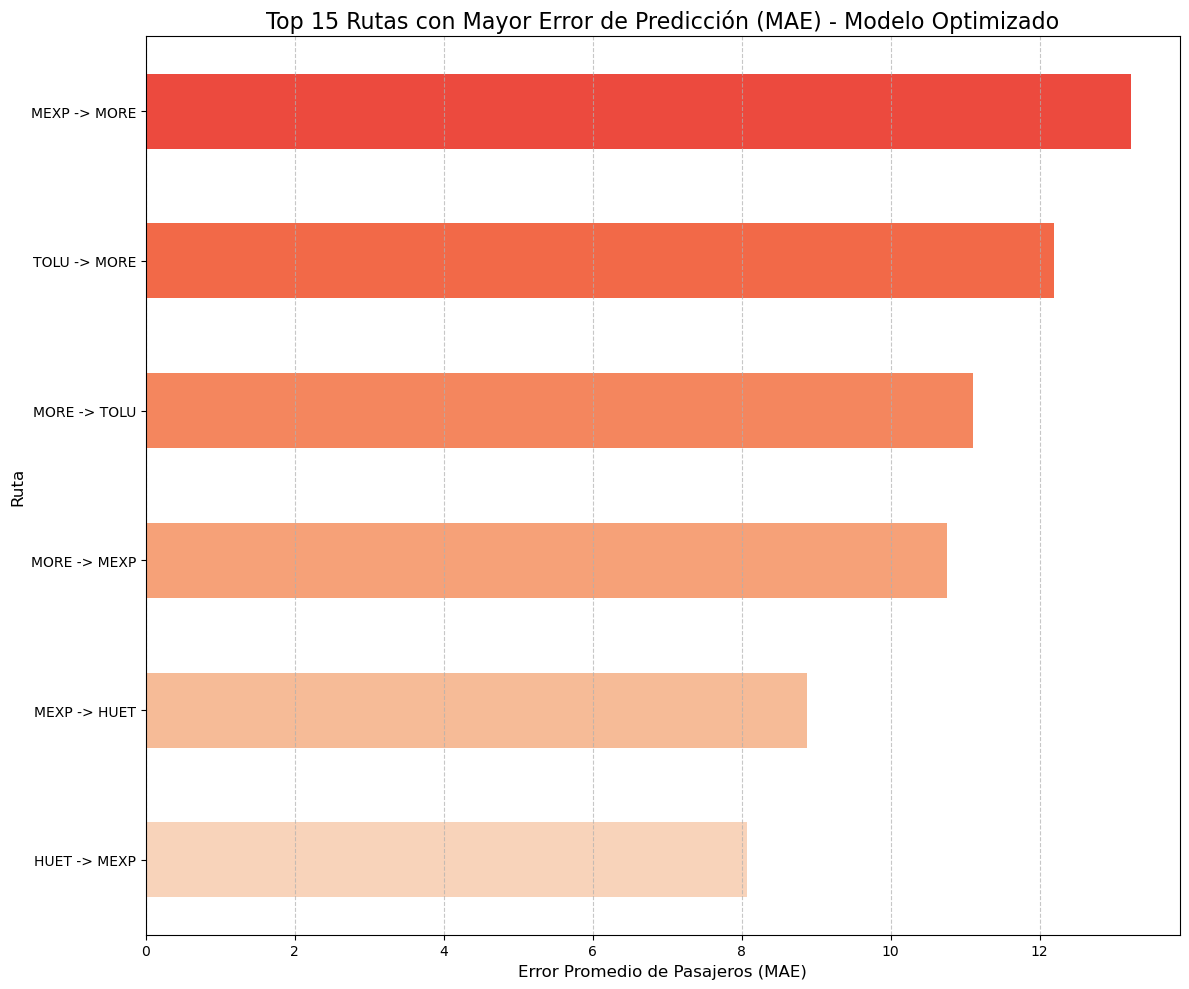

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Asunción ---
# Asumimos que ya tenemos:
# - y_test: los valores reales.
# - predicciones_optimizadas: las predicciones del modelo XGBoost optimizado.
# - df_estudio: tu DataFrame antes de One-Hot Encoding.

print("--- Iniciando Análisis de Error por Ruta (Modelo Optimizado) ---")

# 1. Crear la columna 'RUTA' en df_estudio si no existe
if 'RUTA' not in df_estudio.columns:
    df_estudio['RUTA'] = df_estudio['CV ORIGEN CORRIDA'] + ' -> ' + df_estudio['CV DESTINO CORRIDA']

# 2. Rescatar la ruta original usando el índice de y_test
rutas_originales = df_estudio.loc[y_test.index, 'RUTA']

# 3. Crear el DataFrame de resultados con las NUEVAS predicciones
df_resultados_ruta = pd.DataFrame({
    'Ruta': rutas_originales,
    'Pasajeros_Reales': y_test,
    # ====> AJUSTE REALIZADO AQUÍ <====
    'Pasajeros_Predichos': predicciones_optimizadas
})

# 4. Calcular el error absoluto para cada viaje
df_resultados_ruta['Error_Absoluto'] = abs(df_resultados_ruta['Pasajeros_Reales'] - df_resultados_ruta['Pasajeros_Predichos'])

# 5. Agrupar por Ruta y calcular el MAE
mae_por_ruta = df_resultados_ruta.groupby('Ruta')['Error_Absoluto'].mean()

# Ordenamos para ver las rutas con mayor error primero
mae_por_ruta_ordenado = mae_por_ruta.sort_values(ascending=False)

print("\n--- Error Absoluto Medio (MAE) por Ruta (Modelo Optimizado) ---")
print(mae_por_ruta_ordenado.round(2))

# --- 6. Visualizar las 15 Rutas con Mayor Error ---
print("\nGenerando gráfico de las rutas más problemáticas (Modelo Optimizado)...")
plt.figure(figsize=(12, 10))

# Usamos .head(15) para enfocarnos en las más importantes y .sort_values() para que la mejor quede arriba
mae_por_ruta_ordenado.head(15).sort_values(ascending=True).plot(kind='barh', color=sns.color_palette('rocket_r', n_colors=15))

plt.title('Top 15 Rutas con Mayor Error de Predicción (MAE) - Modelo Optimizado', fontsize=16)
plt.xlabel('Error Promedio de Pasajeros (MAE)', fontsize=12)
plt.ylabel('Ruta', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('GraficaMAEporRuta_Optimizado.png', dpi=300)
plt.show()

--- Iniciando Análisis de Error por Ruta y Día de la Semana ---

--- Tabla Cruzada de Error (MAE) por Ruta y Día de la Semana ---
Las celdas vacías (NaN) significan que no hubo viajes en esa combinación en el conjunto de prueba.
Dia_Semana    Lunes  Martes  Miércoles  Jueves  Viernes  Sábado  Domingo
Ruta                                                                    
HUET -> MEXP   8.20    7.33       8.37    8.09     7.67    7.84     9.00
MEXP -> HUET   8.07    8.73       8.89    9.03     9.20    9.15     9.08
MEXP -> MORE  16.95   12.86      10.50   13.03    19.70    8.75    12.14
MORE -> MEXP  12.33    9.25      10.59   11.97    11.49    9.23    10.76
MORE -> TOLU    NaN   12.61       3.00    8.95    27.83    2.29      NaN
TOLU -> MORE   1.12   19.53        NaN    5.59    17.51   23.81    11.77

Generando mapa de calor (versión a prueba de errores)...


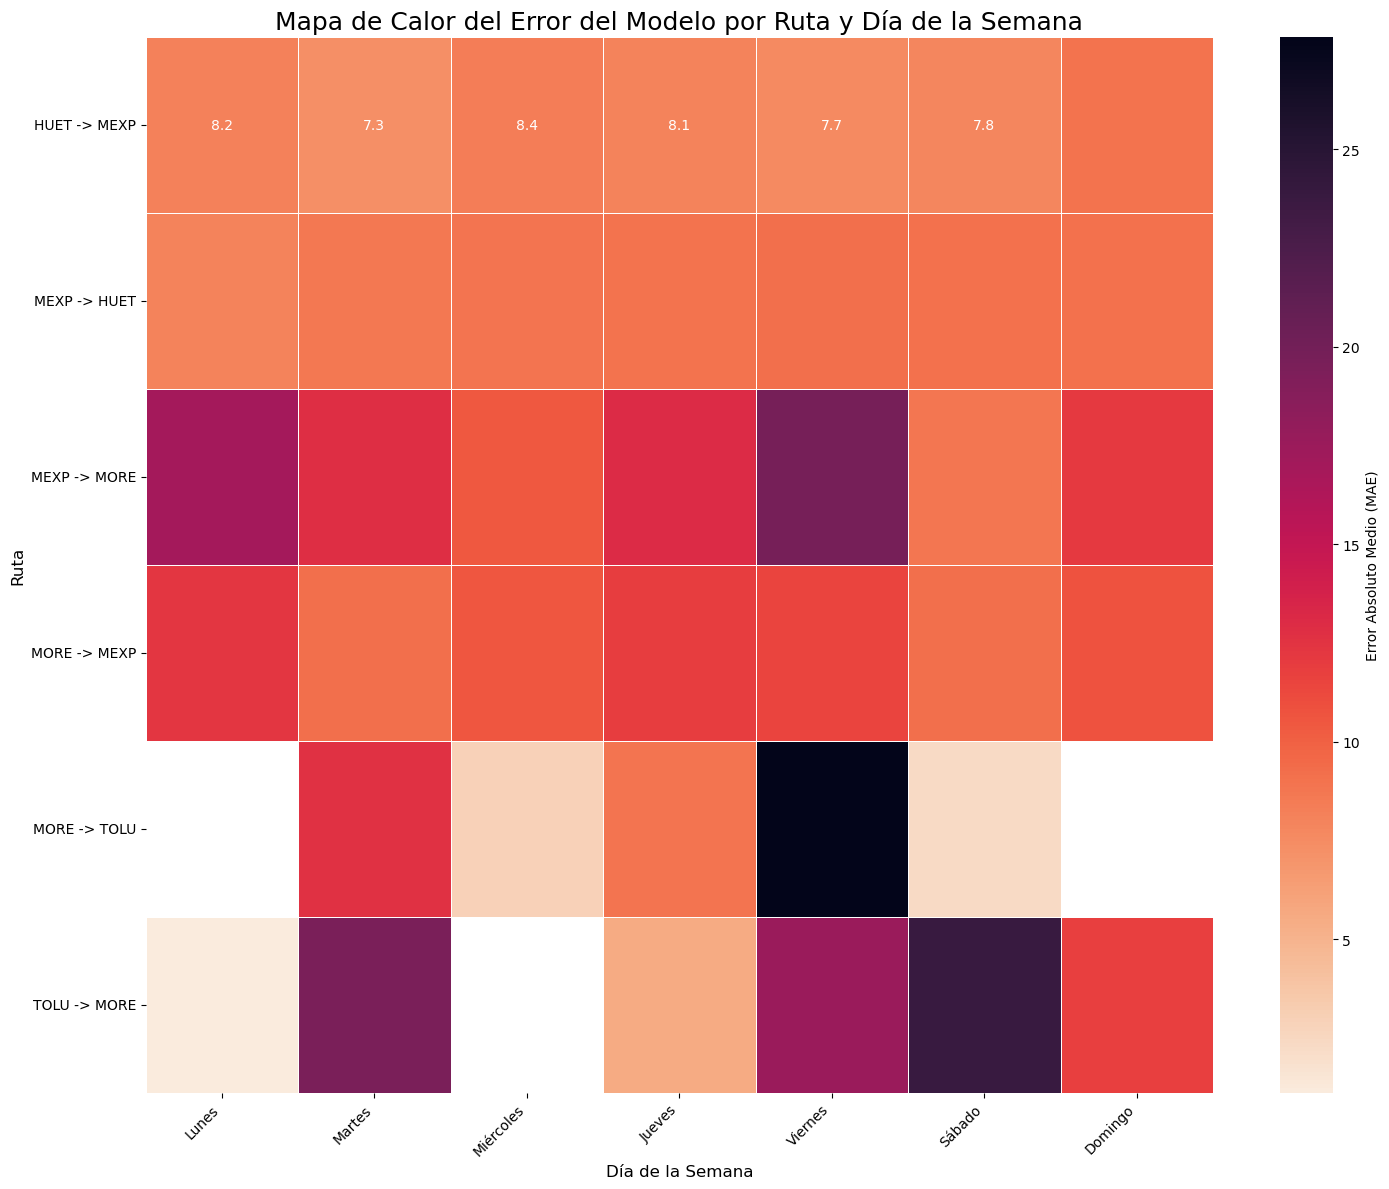

In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Asunciones ---
# Asumimos que ya tenemos: y_test, predicciones_optimizadas, y df_estudio.

print("--- Iniciando Análisis de Error por Ruta y Día de la Semana ---")

# 1. Crear la columna 'RUTA' en df_estudio si no existe
if 'RUTA' not in df_estudio.columns:
    df_estudio['RUTA'] = df_estudio['CV ORIGEN CORRIDA'] + ' -> ' + df_estudio['CV DESTINO CORRIDA']

# 2. Rescatar la ruta y el día de la semana originales usando el índice de y_test
dias_espanol_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves', 4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df_estudio['DIA_SEMANA'] = df_estudio['FECHA_HORA_SALIDA'].dt.dayofweek.map(dias_espanol_map)

# Seleccionamos las columnas que necesitamos del df_estudio original
info_original = df_estudio.loc[y_test.index, ['RUTA', 'DIA_SEMANA']]

# 3. Crear el DataFrame de resultados
df_resultados_detallado = pd.DataFrame({
    'Ruta': info_original['RUTA'],
    'Dia_Semana': info_original['DIA_SEMANA'],
    'Pasajeros_Reales': y_test,
    'Pasajeros_Predichos': predicciones_optimizadas
})

# 4. Calcular el error absoluto
df_resultados_detallado['Error_Absoluto'] = abs(df_resultados_detallado['Pasajeros_Reales'] - df_resultados_detallado['Pasajeros_Predichos'])

# 5. Agrupar por Ruta y Día de la Semana para calcular el MAE
mae_por_ruta_y_dia = df_resultados_detallado.groupby(['Ruta', 'Dia_Semana'])['Error_Absoluto'].mean()

# --- 6. Presentar los Resultados en una Tabla Cruzada ---
# Usamos .unstack() para convertir la lista larga en una matriz fácil de leer
tabla_error_cruzado = mae_por_ruta_y_dia.unstack()

# Reordenamos las columnas para que sigan el orden de la semana
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
tabla_error_cruzado = tabla_error_cruzado.reindex(columns=orden_dias)

print("\n--- Tabla Cruzada de Error (MAE) por Ruta y Día de la Semana ---")
print("Las celdas vacías (NaN) significan que no hubo viajes en esa combinación en el conjunto de prueba.")
print(tabla_error_cruzado.round(2))

# --- 7. Visualizar los Resultados (Versión a Prueba de Errores) ---
print("\nGenerando mapa de calor (versión a prueba de errores)...")
plt.figure(figsize=(15, 12))

# ====> LA SOLUCIÓN FINAL ESTÁ AQUÍ <====
# 1. Obtenemos explícitamente los nombres de las rutas del índice de la tabla.
nombres_de_rutas = tabla_error_cruzado.index

# 2. Le pasamos esos nombres directamente al heatmap con el parámetro 'yticklabels'.
sns.heatmap(
    tabla_error_cruzado,
    annot=True,
    fmt=".1f",
    cmap='rocket_r',
    linewidths=.5,
    cbar_kws={'label': 'Error Absoluto Medio (MAE)'},
    yticklabels=nombres_de_rutas  # <--- Este es el cambio clave
)

plt.title('Mapa de Calor del Error del Modelo por Ruta y Día de la Semana', fontsize=18)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Ruta', fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0) # Mantenemos la rotación para que se lean bien

# Guardamos la imagen (mantenemos las buenas prácticas que ya teníamos)
plt.tight_layout()
plt.savefig('HeatmapErrorRutaDia_FINAL.png', dpi=300, bbox_inches='tight')

plt.show()